In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import wheel as wl
import sklearn as sl
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('/Users/shani/Documents/לימודים שנה ד סמסטר ב/ML/ML Project PartB/XY_train.csv')


In [3]:
only_fraud_ads_df = df[df['fraudulent'] == 1]
only_real_ads_df = df[df['fraudulent'] == 0]
df_no_null = df.fillna('')

In [4]:
def check_keywords(string, keywords):# checks if any of the words in a string appear in a list of keywords
    separators = r'[ \/*-_.:;!,&]+'  # regular expression that matches separators
    for word in re.split(separators, string):
        if word.lower() in keywords:
            return True
    return False

# Basic Data Information

In [5]:
df.shape

(14304, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               14304 non-null  int64 
 1   title                14304 non-null  object
 2   location             14023 non-null  object
 3   department           5078 non-null   object
 4   salary_range         2313 non-null   object
 5   company_profile      11620 non-null  object
 6   description          14303 non-null  object
 7   requirements         12122 non-null  object
 8   benefits             8558 non-null   object
 9   telecommuting        14304 non-null  int64 
 10  has_company_logo     14304 non-null  int64 
 11  has_questions        14304 non-null  int64 
 12  employment_type      11536 non-null  object
 13  required_experience  8682 non-null   object
 14  required_education   7814 non-null   object
 15  industry             10375 non-null  object
 16  func

In [7]:
df.describe()

job_id  telecommuting  has_company_logo  has_questions  \
count  14304.000000   14304.000000      14304.000000   14304.000000   
mean    8932.742310       0.042785          0.793484       0.490282   
std     5147.650264       0.202380          0.404819       0.499923   
min        1.000000       0.000000          0.000000       0.000000   
25%     4475.750000       0.000000          1.000000       0.000000   
50%     8917.500000       0.000000          1.000000       0.000000   
75%    13393.250000       0.000000          1.000000       1.000000   
max    17877.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  14304.000000  
mean       0.049287  
std        0.216474  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

# Missing Values

In [8]:
print(df.isnull().sum())

job_id                     0
title                      0
location                 281
department              9226
salary_range           11991
company_profile         2684
description                1
requirements            2182
benefits                5746
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         2768
required_experience     5622
required_education      6490
industry                3929
function                5164
fraudulent                 0
dtype: int64


# Fraudulent

In [9]:
fraudulent_column_counts = df['fraudulent'].value_counts()
fraudulent_column_counts # 0 for non-fraud ads, 1 for fraud ads

fraudulent
0    13599
1      705
Name: count, dtype: int64

### Visualize the distribution of the target variable

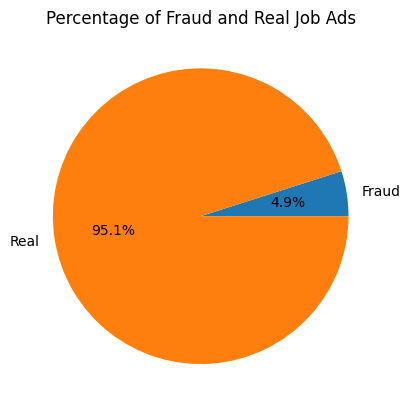

In [10]:
# Count the number of real and fraudulent job ads
fraud_count = only_fraud_ads_df.shape[0]
real_count = only_real_ads_df.shape[0]

# Create a list of counts and labels for the pie chart
counts = [fraud_count, real_count]
labels = ['Fraud', 'Real']

# Create the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Fraud and Real Job Ads')
plt.show()

# Job Title analysis

In [11]:
avg_title_word_count_fraud = only_fraud_ads_df['title'].apply(lambda x: len(str(x).split(" "))).mean()
avg_title_word_count_real = only_real_ads_df['title'].apply(lambda x: len(str(x).split(" "))).mean()

print("Average title word count for fraud job ads: ", round(avg_title_word_count_fraud,1))
print("Average title word count for real job ads: ", round(avg_title_word_count_real,1))

Average title word count for fraud job ads:  4.3
Average title word count for real job ads:  3.9


### Top 10 most common words in the title

In [12]:
title_string = " ".join(df['title'].astype(str)) # Concatenate titles into one long string
title_string = title_string.lower()
title_words = re.findall('\w+', title_string)# convert the text into individual words

stop_words = set(stopwords.words('english'))# Remove stop words

filtered_words = [word for word in title_words if word not in stop_words]

word_counts = Counter(filtered_words)# Count the frequency of each word

top_words = word_counts.most_common(10)# Get the most common words

for word, count in top_words:# Print the top 10 words and their frequencies
    print(word, count)

manager 1791
developer 1449
engineer 1299
sales 1083
senior 778
customer 766
service 717
english 637
teacher 624
marketing 623


### Top 10 most common words in title for fraud ads

In [13]:
titles_str = ' '.join(only_fraud_ads_df['title'].tolist())# Concatenate all titles into a single string
cleaned_str = re.sub(r'[^\w\s]', '', titles_str).lower()# Remove non-word characters and convert to lowercase
words = cleaned_str.split()# Split the cleaned string into words
word_freq = Counter(words)# Count the frequency of each word

top_words_fraud = word_freq.most_common(10)# Get the 10 most common words
top_words_fraud

[('entry', 85),
 ('data', 79),
 ('engineer', 63),
 ('assistant', 63),
 ('home', 57),
 ('manager', 56),
 ('payroll', 56),
 ('positions', 50),
 ('customer', 48),
 ('clerk', 47)]

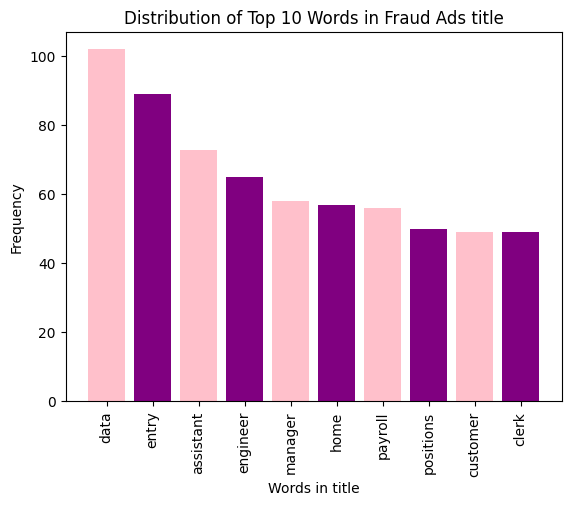

In [14]:
vectorizer = CountVectorizer(stop_words='english') 
title_matrix = vectorizer.fit_transform(only_fraud_ads_df['title'])
title_count = title_matrix.sum(axis=0)
title_freq = [(word, title_count[0, i]) for word, i in vectorizer.vocabulary_.items()]
title_freq = sorted(title_freq, key=lambda x: x[1], reverse=True)[:10]

colors = ['pink','purple']
plt.bar([x[0] for x in title_freq], [x[1] for x in title_freq] , color = colors)
plt.xticks(rotation=90)
plt.title('Distribution of Top 10 Words in Fraud Ads title')
plt.xlabel('Words in title')
plt.ylabel('Frequency')

plt.show()

### Words in fraud ads title and not in real ads title

In [15]:
fraud_df = only_fraud_ads_df
real_df = only_real_ads_df
stop_words = set(stopwords.words('english'))

def clean_text(text):# clean text from special characters and stopwords
    text = re.sub('[^a-zA-Z]+', ' ', str(text))
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

fraud_df['clean_title'] = fraud_df['title'].apply(clean_text)
real_df['clean_title'] = real_df['title'].apply(clean_text)

fraud_words = set()# set of words appears in fraud ads title
for title in fraud_df['clean_title']:
    fraud_words.update(set(title.split()))

real_words = set()# set of words appears in real ads title
for title in real_df['clean_title']:
    real_words.update(set(title.split()))

# Create a list of words that appear in the title of fraud ads but not in real ads
only_fraud_title_words = list(fraud_words - real_words)
only_fraud_title_words

/var/folders/fk/kzk2rmxd7h98417lzy213yy40000gn/T/ipykernel_2115/1116583334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['clean_title'] = fraud_df['title'].apply(clean_text)
/var/folders/fk/kzk2rmxd7h98417lzy213yy40000gn/T/ipykernel_2115/1116583334.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['clean_title'] = real_df['title'].apply(clean_text)


['perioperative',
 'advertisers',
 'deadline',
 'desgin',
 'nicu',
 'subsea',
 'frame',
 'tele',
 'hma',
 'rnfa',
 'graphite',
 'ermin',
 'mt',
 'pipeline',
 'advertise',
 'exploration',
 'kmc',
 'kl',
 'subcontracting',
 'casualty',
 'francis',
 'architectural',
 'info',
 'adminstrative',
 'boys',
 'sm',
 'smb',
 'ebay',
 'pacu',
 'montcalm',
 'urgently',
 'webcam',
 'discipline',
 'circulator',
 'scams',
 'excellence',
 'ninestone',
 'begin',
 'legitimate',
 'peri',
 'girls',
 'receive',
 'contest',
 'sir',
 'nannies',
 'troy',
 'installation',
 'rhomobile',
 'hyatt',
 'parttime',
 'guys',
 'offshore',
 'transcriptionist',
 'trauma',
 'offering',
 'clerks',
 'royale',
 'franciscan',
 'insight',
 'hes',
 'vessel',
 'enroll',
 'northwestern',
 'timers',
 'preservation',
 'machining',
 'crews',
 'vemma',
 'earn',
 'poso',
 'integrity',
 'deserve',
 'vacancy',
 'meridien',
 'paying',
 'recuiter',
 'clerical',
 'enablement',
 'daily',
 'assistan',
 'approval',
 'rooms',
 'getters',
 'well

### title length analtsis:

In [16]:
# Calculate the mean length of company profile for real ads
mean_title_length_real = only_real_ads_df['title'].dropna().str.len().mean()

# Calculate the mean length of company profile for fraud ads
mean_title_length_fraud = only_fraud_ads_df['title'].dropna().str.len().mean()

print('Mean title Length for Real Ads is :', round(mean_title_length_real,1))
print('Mean title Length for Fraud Ads is:', round(mean_title_length_fraud,1))

Mean title Length for Real Ads is : 28.4
Mean title Length for Fraud Ads is: 30.7


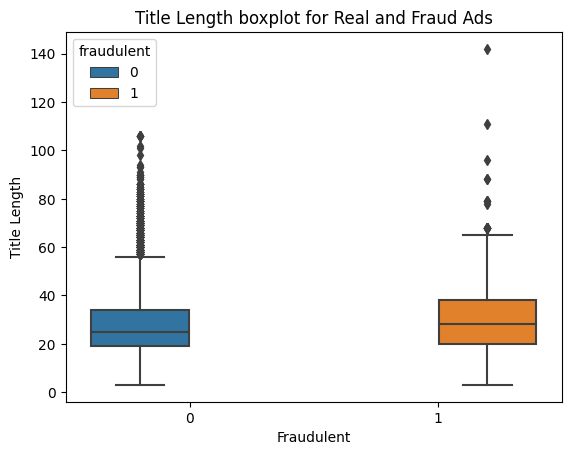

In [17]:
description_nonulls_df = df.dropna(subset=['title'])

# Create a boxplot for company profile length with 'fraudulent' as hue
sns.boxplot(x=description_nonulls_df['fraudulent'], y=description_nonulls_df['title'].str.len(), hue=df['fraudulent'])
plt.xlabel('Fraudulent')
plt.ylabel('Title Length')
plt.title('Title Length boxplot for Real and Fraud Ads')
plt.show()

# Location Analysis

### locations amount

In [18]:
distinct_locations = df['location'].unique()
print('Types of unique locations is {}'.format(len(distinct_locations)))
print('amount of fraud null locations: {}'.format(only_fraud_ads_df['location'].isnull().sum()))

Types of unique locations is 2749
amount of fraud null locations: 15


In [19]:
ads_per_location = df.groupby('location')['fraudulent'].value_counts().unstack().fillna(0)
ads_per_location

fraudulent                  0    1
location                          
AE, ,                     4.0  1.0
AE, , Abudhabi            1.0  0.0
AE, , Dubai               4.0  0.0
AE, , Media City | Dubai  2.0  0.0
AE, AZ,                   3.0  0.0
...                       ...  ...
ZA, NL, Pietermaritzburg  4.0  0.0
ZA, NL, Richards Bay      7.0  0.0
ZA, WC, Cape Town         4.0  0.0
ZA, WC, Stellenbosch      1.0  0.0
ZM, ,                     2.0  0.0

[2748 rows x 2 columns]

### Top 10 frauds Locations

In [20]:
ads_per_location_summary = pd.DataFrame()
ads_per_location_summary['total_ads'] = df.groupby('location').size()# Total number of ads per location
ads_per_location_summary['real_ads'] = ads_per_location[0]# Number of real ads per location
ads_per_location_summary['frauds'] = ads_per_location[1]# Number of frauds per location
ads_per_location_summary['fraud_percentage'] = ads_per_location_summary['frauds'] / ads_per_location_summary['total_ads'] * 100# Percentage of frauds per location
ads_per_location_summary = ads_per_location_summary.nlargest(10, 'frauds')# Top 10 locations with the highest percentage of frauds
ads_per_location_summary

total_ads  real_ads  frauds  fraud_percentage
location                                                            
US, TX, Houston              221     145.0    76.0         34.389140
AU, NSW, Sydney               66      41.0    25.0         37.878788
US, ,                        269     249.0    20.0          7.434944
US, CA, Bakersfield           21       2.0    19.0         90.476190
US, CA, Los Angeles          151     133.0    18.0         11.920530
US, CA, San Mateo             36      19.0    17.0         47.222222
US, NY, New York             516     499.0    17.0          3.294574
US, TX, AUSTIN                13       0.0    13.0        100.000000
US, CA, San Francisco        386     376.0    10.0          2.590674
US, TX, DALLAS                10       0.0    10.0        100.000000

# Department Analysis

In [21]:
Distinct_departmnets = df['department'].unique()
Distinct_departmnets = pd.DataFrame(Distinct_departmnets).dropna()
Distinct_departmnets

0
1      Professional Services
2     Fixed-term & Permanent
3       Provisions by Food52
4               Content team
5                    CSA REP
...                      ...
1148     Business Management
1149        Physical Therapy
1150                Wireless
1151              HOTEL JOBS
1152    Computer/IT Services

[1152 rows x 1 columns]

In [22]:
only_frauds_departments = only_fraud_ads_df['department'].unique()
only_frauds_departments = pd.DataFrame(only_frauds_departments).dropna()
only_frauds_departments

0
1                   CSA REP
2   Information Technology 
3               Engineering
4                Data entry
5             Oil & Energy 
..                      ...
86                       IT
87         Call Center CSR 
88               Technician
89      Sales and Marketing
90               HOTEL JOBS

[90 rows x 1 columns]

# Salary range analysis

In [23]:

# calculate null percentages
null_total = df['salary_range'].isnull().sum()
null_fraud = df.loc[df['fraudulent'] == 1, 'salary_range'].isnull().sum()
null_real = df.loc[df['fraudulent'] == 0, 'salary_range'].isnull().sum()
percent_total = round(null_total / len(df) * 100, 1)
percent_fraud = round(null_fraud / len(df.loc[df['fraudulent'] == 1]) * 100, 1)
percent_real = round(null_real / len(df.loc[df['fraudulent'] == 0]) * 100, 1)

# create a table
data = {'Fraud': [null_fraud, percent_fraud],
        'Real': [null_real, percent_real],
        'Total': [null_total, percent_total]}
Null_table = pd.DataFrame(data, index=['Null values', 'Percentage'])

# print the table
Null_table

Fraud     Real    Total
Null values  522.0  11469.0  11991.0
Percentage    74.0     84.3     83.8

In [24]:
salary_range_df = df


def categorize_salary_range(salary_range):
    if isinstance(salary_range, str):
        salary_number_value = [int(s) for s in re.split(r'[-_ ]', salary_range) if s.isdigit()]
        if len(salary_number_value) >= 2:
            salary = salary_number_value[0]
            if salary < 30000:
                return 'small'
            elif salary < 60000:
                return 'medium'
            else:
                return 'large'
        else:
            return 'unknown'
    else:
        return 'unknown'

salary_range_df['salary_category'] = salary_range_df['salary_range'].apply(categorize_salary_range)
salary_range_df['salary_category'].value_counts()

salary_category
unknown    12011
small        898
medium       780
large        615
Name: count, dtype: int64

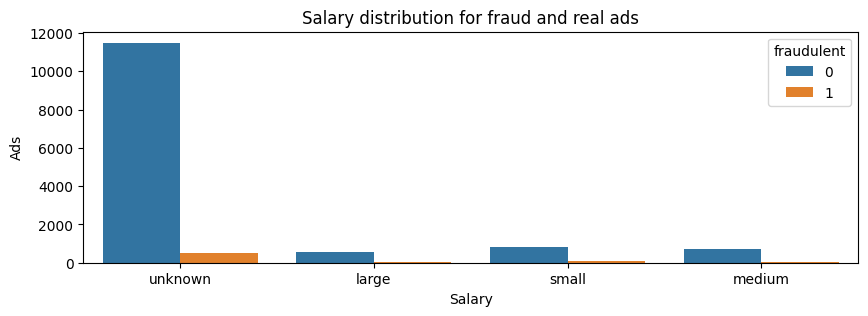

In [25]:
plt.figure(figsize=(10,3))
sns.countplot(x='salary_category', hue='fraudulent', data=salary_range_df)
plt.xlabel('Salary')
plt.ylabel('Ads')
plt.title('Salary distribution for fraud and real ads')
plt.show()

In [26]:
df.drop(['salary_category'],axis=1,inplace = True)

# Company profile analysis

In [27]:
missing_values = df['company_profile'].isnull().sum()# Check for missing values in the company_profile field
None_company_profile_prec = (missing_values / df.shape[0]) * 100
print('Missing values in company_profile field:', missing_values ,'out of 14304')
print('Missing values in company_profile field in percentage:' ,round(None_company_profile_prec,2),'%')

Missing values in company_profile field: 2684 out of 14304
Missing values in company_profile field in percentage: 18.76 %


In [28]:
# Calculate the mean length of company profile for real ads
std_company_profile_length_real = only_real_ads_df['company_profile'].str.len().std()

# Calculate the mean length of company profile for fraud ads
std_company_profile_length_fraud = only_fraud_ads_df['company_profile'].str.len().std()

print('Std Company Profile Length for Real Ads is :', round(std_company_profile_length_real,2))
print('Std Company Profile Length for Fraud Ads is:', round(std_company_profile_length_fraud,2))

Std Company Profile Length for Real Ads is : 540.29
Std Company Profile Length for Fraud Ads is: 313.46


In [29]:
# Calculate the mean length of company profile for real ads
mean_company_profile_length_real = only_real_ads_df['company_profile'].str.len().mean()

# Calculate the mean length of company profile for fraud ads
mean_company_profile_length_fraud = only_fraud_ads_df['company_profile'].str.len().mean()

print('Mean Company Profile Length for Real Ads is :', round(mean_company_profile_length_real,2))
print('Mean Company Profile Length for Fraud Ads is:', round(mean_company_profile_length_fraud,2))

Mean Company Profile Length for Real Ads is : 764.03
Mean Company Profile Length for Fraud Ads is: 717.54


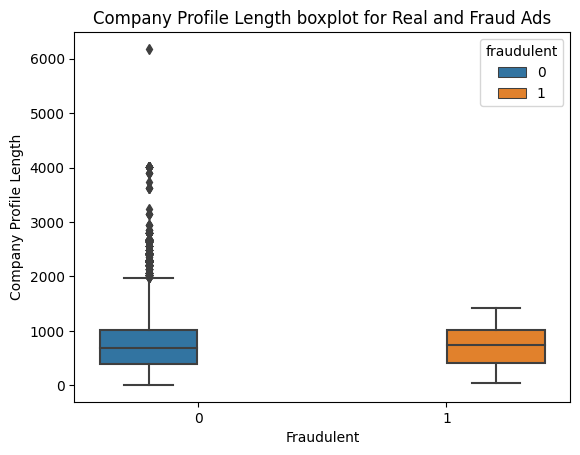

In [30]:
company_profile_nonulls_df = df.dropna(subset=['company_profile'])

# Create a boxplot for company profile length with 'fraudulent' as hue
sns.boxplot(x=company_profile_nonulls_df['fraudulent'], y=company_profile_nonulls_df['company_profile'].str.len(), hue=df['fraudulent'])
plt.xlabel('Fraudulent')
plt.ylabel('Company Profile Length')
plt.title('Company Profile Length boxplot for Real and Fraud Ads')
plt.show()

# Description Analysis

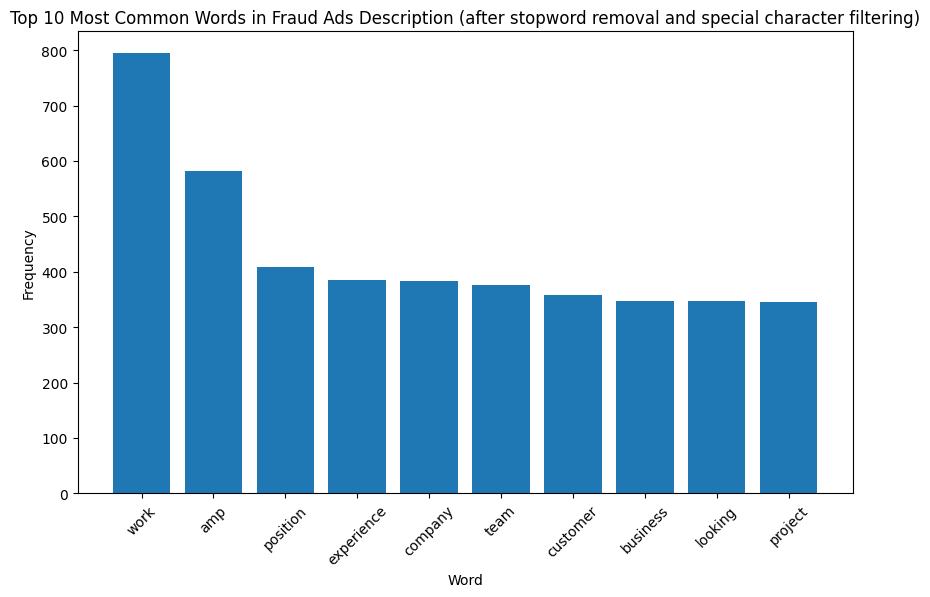

In [31]:
fraud_ads_description = " ".join(only_fraud_ads_df["description"].fillna("").values)# Concatenate all the descriptions into a single string
words = word_tokenize(fraud_ads_description)# Tokenize the description string into individual words
stop_words = set(stopwords.words("english"))# Remove stopwords
words = [word.lower() for word in words if word.lower() not in stop_words]
words = [word for word in words if re.match(r'^[a-zA-Z0-9]+$', word)]# Remove words containing special characters
word_counts = Counter(words)# Count the occurrences of each word
top_10_words = word_counts.most_common(10)# Get the top 10 most common words
top_words = [word for word, count in top_10_words]# Extract the words and their counts into separate lists
word_counts = [count for word, count in top_10_words]

plt.figure(figsize=(10, 6))
plt.bar(top_words, word_counts)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 10 Most Common Words in Fraud Ads Description (after stopword removal and special character filtering)")
plt.xticks(rotation=45)
plt.show()

In [32]:
# Calculate the mean length of company profile for real ads
std_description_length_real = only_real_ads_df['description'].str.len().std()

# Calculate the mean length of company profile for fraud ads
std_description_length_fraud = only_fraud_ads_df['description'].str.len().std()

print('Std description Length for Real Ads is :', round(std_description_length_real,2))
print('Std description Length for Fraud Ads is:', round(std_description_length_fraud,2))

Std description Length for Real Ads is : 896.97
Std description Length for Fraud Ads is: 1013.05


In [33]:

# Calculate the mean length of company profile for real ads
mean_description_length_real = only_real_ads_df['description'].dropna().str.len().mean()

# Calculate the mean length of company profile for fraud ads
mean_description_length_fraud = only_fraud_ads_df['description'].dropna().str.len().mean()

print('Mean description Length for Real Ads is :', round(mean_description_length_real,2))
print('Mean description Length for Fraud Ads is:', round(mean_description_length_fraud,2))

Mean description Length for Real Ads is : 1225.53
Mean description Length for Fraud Ads is: 1160.57


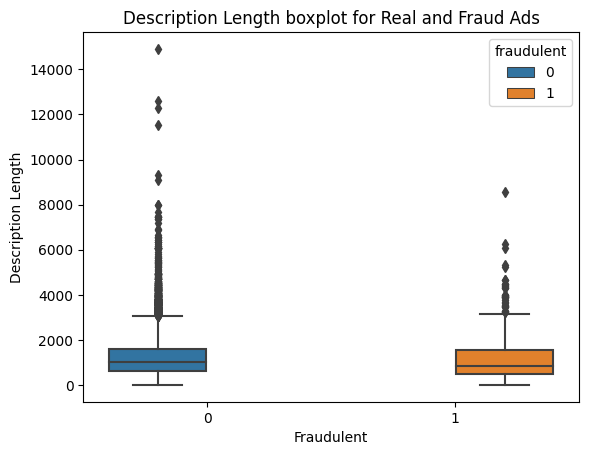

In [34]:
description_nonulls_df = df.dropna(subset=['description'])

# Create a boxplot for company profile length with 'fraudulent' as hue
sns.boxplot(x=description_nonulls_df['fraudulent'], y=description_nonulls_df['description'].str.len(), hue=df['fraudulent'])
plt.xlabel('Fraudulent')
plt.ylabel('Description Length')
plt.title('Description Length boxplot for Real and Fraud Ads')
plt.show()

# Requirements analysis

In [35]:
# Calculate the mean length of company profile for real ads
mean_requirements_length_real = only_real_ads_df['requirements'].dropna().str.len().mean()

# Calculate the mean length of company profile for fraud ads
mean_requirements_length_fraud = only_fraud_ads_df['requirements'].dropna().str.len().mean()

print('Mean requirements Length for Real Ads is :', round(mean_requirements_length_real,2))
print('Mean requirements Length for Fraud Ads is:', round(mean_requirements_length_fraud,2))

Mean requirements Length for Real Ads is : 697.89
Mean requirements Length for Fraud Ads is: 543.9


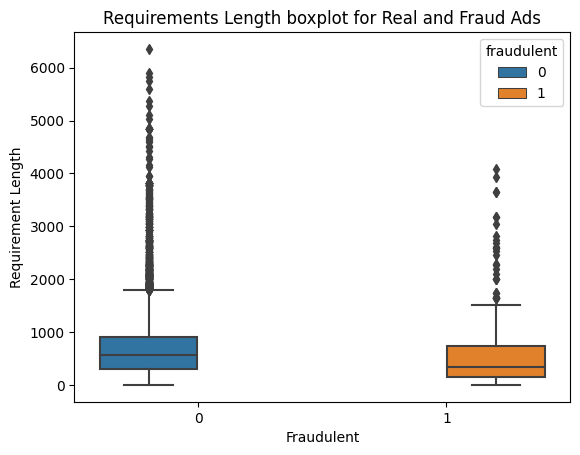

In [36]:
requirements_nonulls_df = df.dropna(subset=['requirements'])

# Create a boxplot for company profile length with 'fraudulent' as hue
sns.boxplot(x=requirements_nonulls_df['fraudulent'], y=requirements_nonulls_df['requirements'].str.len(), hue=df['fraudulent'])
plt.xlabel('Fraudulent')
plt.ylabel('Requirement Length')
plt.title('Requirements Length boxplot for Real and Fraud Ads')
plt.show()

In [37]:
all_data = df # all the data
fraudulent_ads = only_fraud_ads_df # Filter for real ads
not_fraudulent_ads = only_real_ads_df# Filter for fraud ads

In [38]:
all_data['requirements_len'] = all_data['requirements'].str.len() # describe of all the data
print(all_data['requirements_len'].describe())

count    12122.000000
mean       690.513942
std        600.830642
min          1.000000
25%        298.000000
50%        559.000000
75%        899.000000
max       6356.000000
Name: requirements_len, dtype: float64


In [39]:
not_fraudulent_ads['requirements_len'] = not_fraudulent_ads['requirements'].str.len() # describe of real ads only
print(not_fraudulent_ads['requirements_len'].describe())

count    11541.000000
mean       697.894983
std        600.205710
min          1.000000
25%        311.000000
50%        564.000000
75%        904.000000
max       6356.000000
Name: requirements_len, dtype: float64


/var/folders/fk/kzk2rmxd7h98417lzy213yy40000gn/T/ipykernel_2115/1551550169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_fraudulent_ads['requirements_len'] = not_fraudulent_ads['requirements'].str.len() # describe of real ads only


In [40]:
fraudulent_ads['requirements_len'] = fraudulent_ads['requirements'].str.len() # describe of fraud ads only
print(fraudulent_ads['requirements_len'].describe())

count     581.000000
mean      543.896730
std       594.925057
min         6.000000
25%       149.000000
50%       348.000000
75%       734.000000
max      4077.000000
Name: requirements_len, dtype: float64


/var/folders/fk/kzk2rmxd7h98417lzy213yy40000gn/T/ipykernel_2115/173968240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_ads['requirements_len'] = fraudulent_ads['requirements'].str.len() # describe of fraud ads only


### top 10 most common words on fraud ads requirements

In [41]:
text = " ".join(fraudulent_ads['requirements'].astype(str))# Concatenate all the requirements into one long string
text = text.lower()# Convert all text to lowercase
words = re.findall('\w+', text)# Tokenize the text into individual words
stop_words = set(stopwords.words('english'))# Remove stop words
filtered_words = [word for word in words if word not in stop_words]
word_counts = Counter(filtered_words)# Count the frequency of each word
top_words_fruad = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]# Sort the words by frequency in descending order
for word, count in top_words_fruad:# Print the top 10 words and their frequencies
    print(word, count)

experience 767
skills 514
work 374
ability 349
years 253
must 241
amp 238
knowledge 228
required 221
computer 180


In [42]:
df.drop('requirements_len',axis=1, inplace = True)

# Benefits Analysis

### Top 10 most common words in benefits for fraud ads

In [43]:
text = " ".join(only_fraud_ads_df['benefits'].astype(str))# Concatenate all the benefits into one long string
text = text.lower()# Convert all text to lowercase
words = re.findall('\w+', text)# Tokenize the text into individual words
stop_words = set(stopwords.words('english'))# Remove stop words
filtered_words = [word for word in words if word not in stop_words]
word_counts = Counter(filtered_words)# Count the frequency of each word
top_words_fruad = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]# Sort the words by frequency in descending order
for word, count in top_words_fruad:# Print the top 10 words and their frequencies
    print(word, count)

nan 291
benefits 245
company 178
work 172
training 129
paid 129
time 128
environment 114
competitive 111
get 111


### Top 10 most common words in benefits for real ads

In [44]:
text = " ".join(only_real_ads_df['benefits'].astype(str))# Concatenate all the benefits into one long string
text = text.lower()# Convert all text to lowercase
words = re.findall('\w+', text)# Tokenize the text into individual words
filtered_words = [word for word in words if word not in stop_words]
word_counts = Counter(filtered_words)# Count the frequency of each word
top_words_fruad = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]# Sort the words by frequency in descending order
for word, count in top_words_fruad:# Print the top 10 words and their frequencies
    print(word, count)

nan 5455
work 3442
benefits 2846
company 2637
competitive 2296
team 2114
salary 1931
time 1870
paid 1846
amp 1602


In [45]:
# Calculate the mean length of company profile for real ads
std_benefits_length_real = only_real_ads_df['benefits'].dropna().str.len().std()

# Calculate the mean length of company profile for fraud ads
std_benefits_length_fraud = only_fraud_ads_df['benefits'].dropna().str.len().std()

print('Std benefits Length for Real Ads is :', round(std_benefits_length_real,2))
print('Std benefits Length for Fraud Ads is:', round(std_benefits_length_fraud,2))

Std benefits Length for Real Ads is : 372.3
Std benefits Length for Fraud Ads is: 422.05


In [46]:
# Calculate the mean length of company profile for real ads
mean_benefits_length_real = only_real_ads_df['benefits'].dropna().str.len().mean()

# Calculate the mean length of company profile for fraud ads
mean_benefits_length_fraud = only_fraud_ads_df['benefits'].dropna().str.len().mean()

print('Mean benefits Length for Real Ads is :', round(mean_benefits_length_real,2))
print('Mean benefits Length for Fraud Ads is:', round(mean_benefits_length_fraud,2))

Mean benefits Length for Real Ads is : 348.12
Mean benefits Length for Fraud Ads is: 372.02


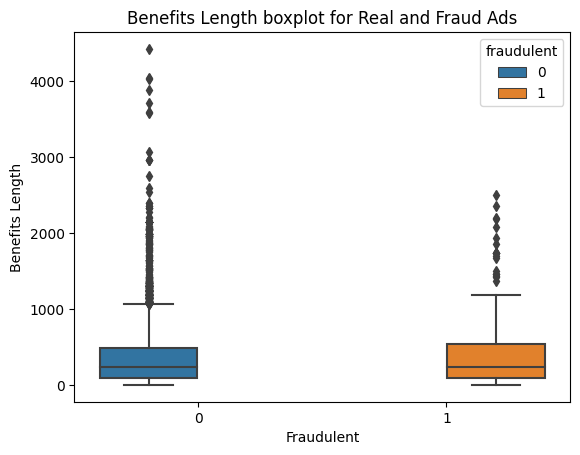

In [47]:
benefits_nonulls_df = df.dropna(subset=['benefits'])

# Create a boxplot for company profile length with 'fraudulent' as hue
sns.boxplot(x=benefits_nonulls_df['fraudulent'], y=benefits_nonulls_df['benefits'].str.len(), hue=df['fraudulent'])
plt.xlabel('Fraudulent')
plt.ylabel('Benefits Length')
plt.title('Benefits Length boxplot for Real and Fraud Ads')
plt.show()

# Telecommuting analysis

In [48]:
# percentage of telecommuting positions in all the data
overall_telecommuting_pct = (df['telecommuting'].sum() / df.shape[0]) * 100
print(f"Percentage of telecommuting positions in all of the data: {overall_telecommuting_pct:.2f}%")

# percentage of telecommuting positions for real job postings
real_telecommuting_pct = (only_real_ads_df['telecommuting'].sum() / only_real_ads_df.shape[0]) * 100
print(f"Percentage of telecommuting positions in real ads: {real_telecommuting_pct:.2f}%")

# percentage of telecommuting positions for fraudulent job postings
fraud_telecommuting_pct = (only_fraud_ads_df['telecommuting'].sum() / only_fraud_ads_df.shape[0]) * 100
print(f"Percentage of telecommuting positions in fraud ads: {fraud_telecommuting_pct:.2f}%")

Percentage of telecommuting positions in all of the data: 4.28%
Percentage of telecommuting positions in real ads: 4.11%
Percentage of telecommuting positions in fraud ads: 7.52%


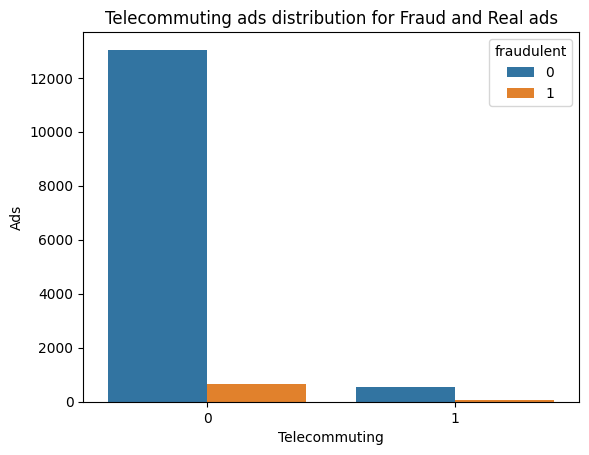

In [49]:
sns.countplot(x='telecommuting', hue='fraudulent', data=df )
plt.xlabel('Telecommuting')
plt.ylabel('Ads')
plt.title('Telecommuting ads distribution for Fraud and Real ads')
plt.show()


# Has Company Logo Analysis

In [50]:
# percentage of Has Company Logo positions in the overall dataset
overall_has_company_logo_pct = (df['has_company_logo'].sum() / df.shape[0]) * 100
print(f"Percentage of has_company_logo positions in all of the data: {overall_has_company_logo_pct:.2f}%")

# percentage of Has Company Logo positions for real ads 
real_has_company_logo_pct = (only_real_ads_df['has_company_logo'].sum() / only_real_ads_df.shape[0]) * 100
print(f"Percentage of has_company_logo positions in real ads: {real_has_company_logo_pct:.2f}%")

# percentage of Has Company Logo positions for fraud ads 
fraud_has_company_logo_pct = (only_fraud_ads_df['has_company_logo'].sum() / only_fraud_ads_df.shape[0]) * 100
print(f"Percentage of has_company_logo positions in fraud ads: {fraud_has_company_logo_pct:.2f}%")

Percentage of has_company_logo positions in all of the data: 79.35%
Percentage of has_company_logo positions in real ads: 81.80%
Percentage of has_company_logo positions in fraud ads: 32.06%


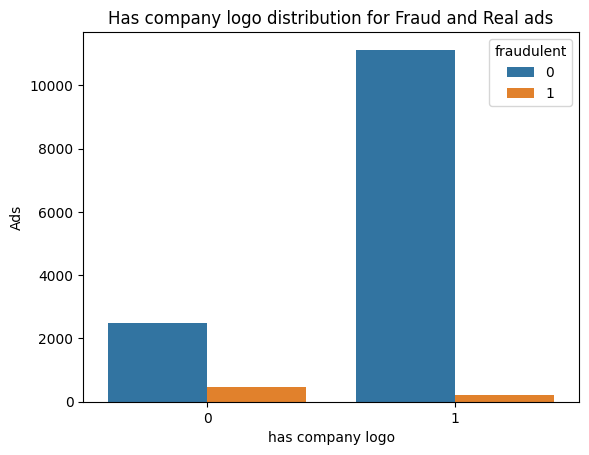

In [51]:
sns.countplot(x='has_company_logo', hue='fraudulent', data=df )
plt.xlabel('has company logo')
plt.ylabel('Ads')
plt.title('Has company logo distribution for Fraud and Real ads')
plt.show()

# Has questions analysis

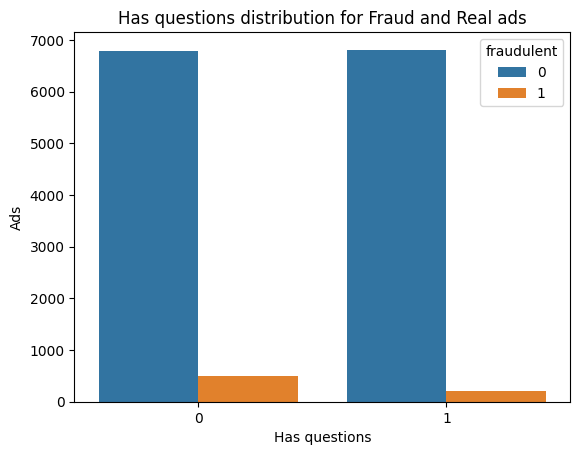

In [52]:
sns.countplot(x='has_questions', hue='fraudulent', data=df )
plt.xlabel('Has questions')
plt.ylabel('Ads')
plt.title('Has questions distribution for Fraud and Real ads')
plt.show()

# Employment type analysis

### Distribution of Employment Types for fraud and real ads

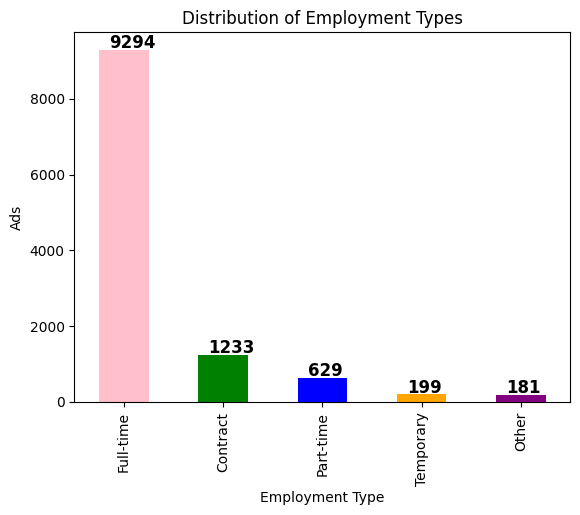

In [53]:
colors = ['pink', 'green', 'blue', 'orange', 'purple', 'gray']
ax = df['employment_type'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Ads')
for i, v in enumerate(df['employment_type'].value_counts()):
    ax.text(i - 0.15, v + 50, str(v), color='black', fontweight='bold', fontsize=12)


### Fraud and real ads for each employment type

Text(0, 0.5, 'Ads')

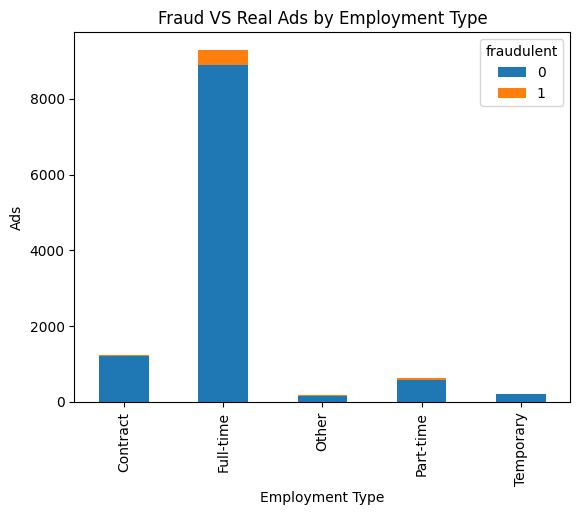

In [54]:
pd.crosstab(df['employment_type'], df['fraudulent']).plot(kind='bar', stacked=True)
plt.title('Fraud VS Real Ads by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Ads')

### The distribution of required experience for each employment type in the dataset

Text(0, 0.5, 'Ads')

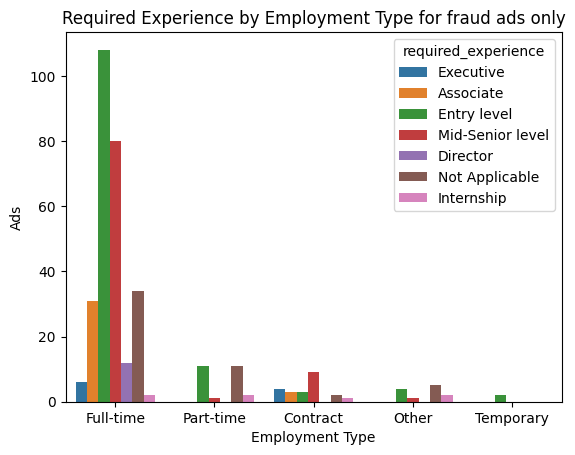

In [55]:
sns.countplot(x='employment_type', hue='required_experience', data=only_fraud_ads_df)
plt.title('Required Experience by Employment Type for fraud ads only')
plt.xlabel('Employment Type')
plt.ylabel('Ads')

# Requiered expirements analysis

In [56]:
print(df['required_experience'].isnull().sum())

5622


In [57]:
df['required_experience'].value_counts()

required_experience
Mid-Senior level    3064
Entry level         2151
Associate           1825
Not Applicable       899
Director             311
Internship           309
Executive            123
Name: count, dtype: int64

In [58]:
pd.crosstab(df['required_experience'], df['fraudulent'], normalize='index')

fraudulent                  0         1
required_experience                    
Associate            0.981370  0.018630
Director             0.961415  0.038585
Entry level          0.932125  0.067875
Executive            0.918699  0.081301
Internship           0.977346  0.022654
Mid-Senior level     0.970300  0.029700
Not Applicable       0.942158  0.057842

### Required experience distribution for fraud and real ads

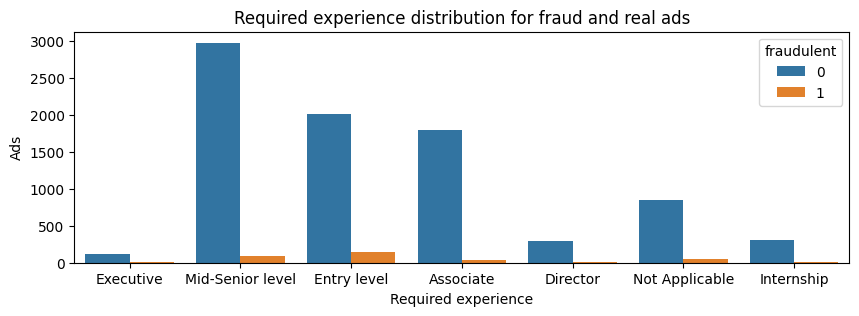

In [59]:
plt.figure(figsize=(10,3))
sns.countplot(x='required_experience', hue='fraudulent', data=df)
plt.xlabel('Required experience')
plt.ylabel('Ads')
plt.title('Required experience distribution for fraud and real ads')
plt.show()

# required_education

In [60]:
print(df['required_education'].isnull().sum())

6490


In [61]:
df['required_education'].value_counts()

required_education
Bachelor's Degree                    4127
High School or equivalent            1651
Unspecified                          1113
Master's Degree                       323
Associate Degree                      219
Certification                         141
Some College Coursework Completed      89
Professional                           63
Vocational                             39
Some High School Coursework            22
Doctorate                              16
Vocational - HS Diploma                 6
Vocational - Degree                     5
Name: count, dtype: int64

### Frequency Distribution of Required Education in fraud ads

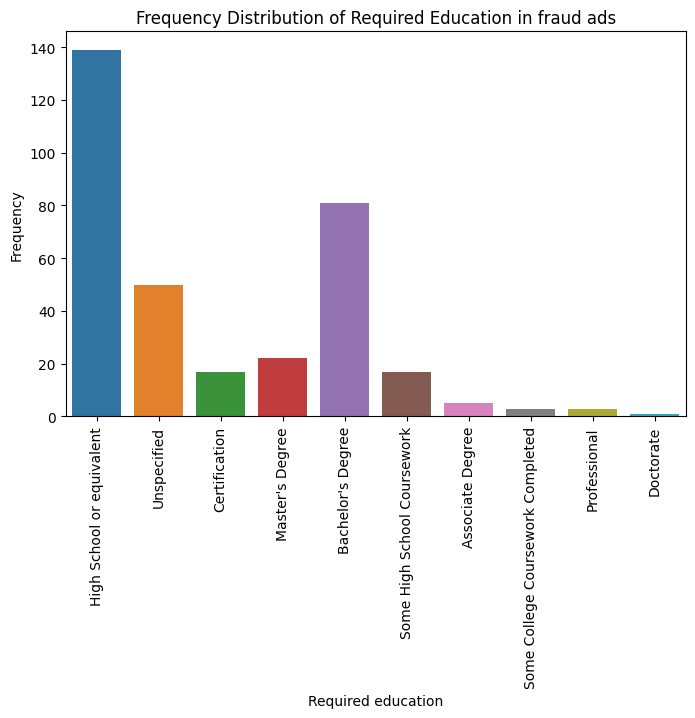

In [62]:
plt.figure(figsize=(8,5))
sns.countplot(x='required_education', data=only_fraud_ads_df)
plt.xticks(rotation=90)
plt.xlabel('Required education')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Required Education in fraud ads')
plt.show()

In [63]:
pd.crosstab(df['required_education'], df['fraudulent'], normalize='index')

fraudulent                                0         1
required_education                                   
Associate Degree                   0.977169  0.022831
Bachelor's Degree                  0.980373  0.019627
Certification                      0.879433  0.120567
Doctorate                          0.937500  0.062500
High School or equivalent          0.915809  0.084191
Master's Degree                    0.931889  0.068111
Professional                       0.952381  0.047619
Some College Coursework Completed  0.966292  0.033708
Some High School Coursework        0.227273  0.772727
Unspecified                        0.955076  0.044924
Vocational                         1.000000  0.000000
Vocational - Degree                1.000000  0.000000
Vocational - HS Diploma            1.000000  0.000000

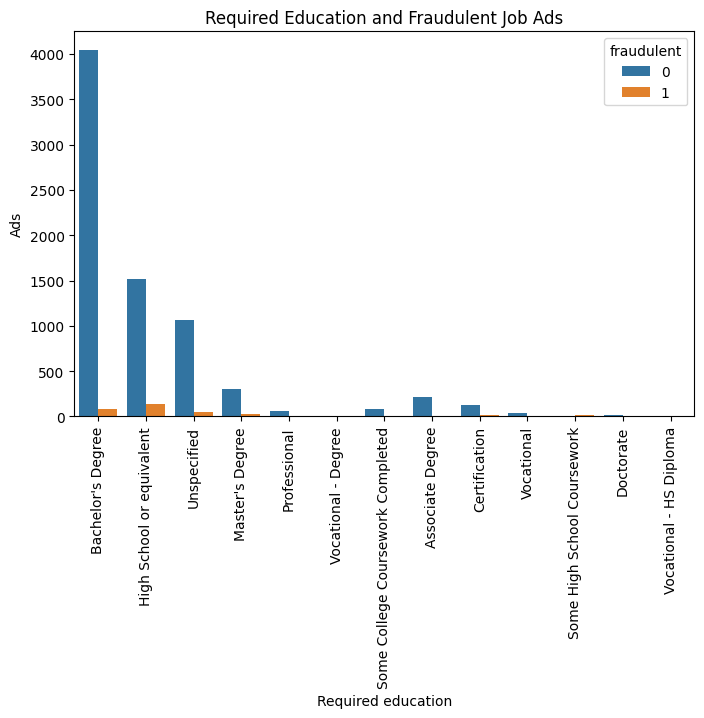

In [64]:
plt.figure(figsize=(8,5))
sns.countplot(x='required_education', hue='fraudulent', data=df)
plt.xlabel('Required education')
plt.ylabel('Ads')
plt.title('Required Education and Fraudulent Job Ads')
plt.xticks(rotation=90)
plt.show()

# Industry analysis

In [65]:
print(df['industry'].isnull().sum())

3929


In [66]:
df['industry'].value_counts().nlargest(10)

industry
Information Technology and Services    1377
Computer Software                      1118
Internet                                844
Education Management                    663
Marketing and Advertising               643
Financial Services                      619
Hospital & Health Care                  396
Consumer Services                       290
Telecommunications                      265
Oil & Energy                            240
Name: count, dtype: int64

# Function analysis

In [67]:
len(df['function'].unique())

38

In [68]:
df['function'].value_counts().nlargest(10)

function
Information Technology    1410
Sales                     1199
Engineering               1066
Customer Service           974
Marketing                  662
Administrative             493
Health Care Provider       270
Design                     263
Other                      260
Education                  258
Name: count, dtype: int64

In [69]:
pd.crosstab(df['function'], df['fraudulent'], normalize='index')

fraudulent                     0         1
function                                  
Accounting/Auditing     0.872093  0.127907
Administrative          0.797160  0.202840
Advertising             0.945205  0.054795
Art/Creative            0.989899  0.010101
Business Analyst        0.984848  0.015152
Business Development    0.951613  0.048387
Consulting              0.965217  0.034783
Customer Service        0.944559  0.055441
Data Analyst            0.942029  0.057971
Design                  0.992395  0.007605
Distribution            0.904762  0.095238
Education               0.996124  0.003876
Engineering             0.913696  0.086304
Finance                 0.914286  0.085714
Financial Analyst       0.888889  0.111111
General Business        0.981132  0.018868
Health Care Provider    0.996296  0.003704
Human Resources         0.964912  0.035088
Information Technology  0.981560  0.018440
Legal                   1.000000  0.000000
Management              0.976190  0.023810
Manufacturing           0.967742  0.032258
Marketing               0.986405  0.013595
Other                   0.896154  0.103846
Product Management      1.000000  0.000000
Production              1.000000  0.000000
Project Management      0.952055  0.047945
Public Relations        0.984375  0.015625
Purchasing              1.000000  0.000000
Quality Assurance       1.000000  0.000000
Research                1.000000  0.000000
Sales                   0.970809  0.029191
Science                 1.000000  0.000000
Strategy/Planning       0.972222  0.027778
Supply Chain            1.000000  0.000000
Training                1.000000  0.000000
Writing/Editing         1.000000  0.000000

### functions only in fraud and never in real ads

In [70]:
fraud_func_not_real = set(only_fraud_ads_df['function']) - set(only_real_ads_df['function'])
print(fraud_func_not_real)
print('Nan of the functions appears only in fraud ads and never in real ads')

set()
Nan of the functions appears only in fraud ads and never in real ads


### functions only in real and never in fraud ads

In [71]:
real_func_not_fraud = set(only_real_ads_df['function']) - set(only_fraud_ads_df['function'])
print(real_func_not_fraud)
print('functions appears only in real ads and never in fraud ads')

{'Quality Assurance', 'Legal', 'Training', 'Research', 'Supply Chain', 'Science', 'Purchasing', 'Writing/Editing', 'Production', 'Product Management'}
functions appears only in real ads and never in fraud ads


# Connection between 2 textual veriables analysis

### words from function appears in title 

In [72]:
# apply the function to each row of the DataFrame
df_no_null['title_matches_function'] = df_no_null.apply(lambda row: check_keywords(row['title'], row['function'].lower().split('/')), axis=1)

fraud_ads_function_in_title = df_no_null[(df_no_null['title_matches_function']) & (df_no_null['fraudulent'] == 1)]
real_ads_function_in_title = df_no_null[(df_no_null['title_matches_function']) & (df_no_null['fraudulent'] == 0)]
print('Fraud ads where words from function appears in the title: {} in percentage out of all fraud ads: {}'.format(fraud_ads_function_in_title.shape[0],(fraud_ads_function_in_title.shape[0]/len(only_fraud_ads_df))*100))
print('Reald ads where words from function appears in the title: {} in percentage out of all real ads: {}'.format(real_ads_function_in_title.shape[0],(real_ads_function_in_title.shape[0]/len(only_real_ads_df))*100))

Fraud ads where words from function appears in the title: 273 in percentage out of all fraud ads: 38.72340425531915
Reald ads where words from function appears in the title: 4868 in percentage out of all real ads: 35.79674976101184


### Words from required_experience appears in description 

In [73]:
# create a function that checks if any of the words in a string appear in a list of keywords
def check_keywords_for_required_experience(string, keywords):
    separators = r'[ \/*_.:;!,&]+'  # regular expression that matches separators
    for word in re.split(separators, string):
        if word.lower() in keywords:
            return True
    return False

# apply the function to each row of the DataFrame
df_no_null = df_no_null[df_no_null['required_experience'] != 'Not Applicable']
df_no_null['description_matches_requiredExperience'] = df_no_null.apply(lambda row: 
    check_keywords_for_required_experience(row['description'], re.split(r'[ /&]+', row['required_experience'].lower())) 
    if row['required_experience'] else False, axis=1)

fraud_ads_description_matches_requiredExperience = df_no_null[(df_no_null['description_matches_requiredExperience']) & (df_no_null['fraudulent'] == 1)]
real_ads_description_matches_requiredExperience = df_no_null[(df_no_null['description_matches_requiredExperience']) & (df_no_null['fraudulent'] == 0)]
print('Fraud ads where required_experience appears in the description: {} in percentage out of all fraud ads: {}'.format(fraud_ads_description_matches_requiredExperience.shape[0],(fraud_ads_description_matches_requiredExperience.shape[0]/len(only_fraud_ads_df))*100))
print('Reald ads where required_experience appears in the description: {} in percentage out of all real ads: {}'.format(real_ads_description_matches_requiredExperience.shape[0],(real_ads_description_matches_requiredExperience.shape[0]/len(only_real_ads_df))*100))

Fraud ads where required_experience appears in the description: 75 in percentage out of all fraud ads: 10.638297872340425
Reald ads where required_experience appears in the description: 993 in percentage out of all real ads: 7.302007500551511


### Words from industry appears in description

In [74]:
# apply the function to each row of the DataFrame
df_no_null['description_matches_industry'] = df_no_null.apply(lambda row: 
    check_keywords(row['description'], re.split(r'[ /*-_.:;!,&]+', row['industry'].lower())) 
    if row['industry'] else False, axis=1)

fraud_ads_description_matches_industry = df_no_null[(df_no_null['description_matches_industry']) & (df_no_null['fraudulent'] == 1)]
real_ads_description_matches_industry = df_no_null[(df_no_null['description_matches_industry']) & (df_no_null['fraudulent'] == 0)]
print('Fraud ads where industry appears in the description: {} in percentage out of all fraud ads: {}'.format(fraud_ads_description_matches_industry.shape[0],(fraud_ads_description_matches_industry.shape[0]/len(only_fraud_ads_df))*100))
print('Real ads where industry appears in the description: {} in percentage out of all real ads: {}'.format(real_ads_description_matches_industry.shape[0],(real_ads_description_matches_industry.shape[0]/len(only_real_ads_df))*100))

Fraud ads where industry appears in the description: 181 in percentage out of all fraud ads: 25.673758865248224
Real ads where industry appears in the description: 4281 in percentage out of all real ads: 31.4802559011692


### Words from department appears in description

In [75]:
# apply the function to each row of the DataFrame
df_no_null['description_matches_department'] = df_no_null.apply(lambda row: 
    check_keywords(row['description'], re.split(r'[ /*-_.:;!,&]+', row['department'].lower())) 
    if row['department'] else False, axis=1)

fraud_ads_description_matches_department = df_no_null[(df_no_null['description_matches_department']) & (df_no_null['fraudulent'] == 1)]
real_ads_description_matches_department = df_no_null[(df_no_null['description_matches_department']) & (df_no_null['fraudulent'] == 0)]
print('Fraud ads where department appears in the description: {} in percentage out of all fraud ads: {}'.format(fraud_ads_description_matches_department.shape[0],(fraud_ads_description_matches_department.shape[0]/len(only_fraud_ads_df))*100))
print('Real ads where department appears in the description: {} in percentage out of all real ads: {}'.format(real_ads_description_matches_department.shape[0],(real_ads_description_matches_department.shape[0]/len(only_real_ads_df))*100))

Fraud ads where department appears in the description: 123 in percentage out of all fraud ads: 17.4468085106383
Real ads where department appears in the description: 2284 in percentage out of all real ads: 16.795352599455843


# 1. Pre-processing

## Remove Duplicates:

In [76]:
cols_to_check = ['title', 'location', 'company_profile', 'description', 'requirements', 'employment_type', 'industry', 'function']
duplicates = df[df.duplicated(subset=cols_to_check, keep=False)] #check duplicates
print(f"Number of duplicate rows found: {len(duplicates)}")
df.drop_duplicates(subset=cols_to_check, inplace=True)

Number of duplicate rows found: 407


## Missing values:

In [77]:
df['location'].fillna('Unknown', inplace=True)
df['company_profile'].fillna('', inplace=True)
df['description'].fillna('', inplace=True)
df['requirements'].fillna('', inplace=True)
df['benefits'].fillna('', inplace=True)
df['salary_range'].fillna('', inplace=True)
df['employment_type'].fillna('Unknown', inplace=True)
df['department'].fillna('Unknown', inplace=True)
df['required_experience'].fillna('Unknown', inplace=True)
df['required_education'].fillna('Unknown', inplace=True)
df['industry'].fillna('Unknown', inplace=True)
df['function'].fillna('Unknown', inplace=True)

## Data type conversions:

### Location

In [78]:
# Define a function to extract the category from a location value
def extract_category(location):
    return location.split(',')[0].strip()

# Apply the mapping to the 'location' column
df['location'] = df['location'].apply(extract_category)

In [79]:
# Define the mapping
category_mapping = {
    'NZ': 'APAC',
    'US': 'Americas',
    'MY': 'APAC',
    'GB': 'EMEA',
    'CA': 'Americas',
    'GR': 'EMEA',
    'ES': 'EMEA',
    'BH': 'EMEA',
    'VN': 'APAC',
    'IN': 'APAC',
    'DE': 'EMEA',
    'NL': 'EMEA',
    'PH': 'APAC',
    'AU': 'APAC',
    'HK': 'APAC',
    'KH': 'APAC',
    'SI': 'EMEA',
    'EE': 'EMEA',
    'Unknown': 'Unknown',
    'RS': 'EMEA',
    'EG': 'EMEA',
    'BR': 'Americas',
    'PL': 'EMEA',
    'ZA': 'Africa',
    'IL': 'EMEA',
    'FR': 'EMEA',
    'BE': 'EMEA',
    'IE': 'EMEA',
    'MT': 'EMEA',
    'MU': 'EMEA',
    'IQ': 'EMEA',
    'TR': 'EMEA',
    'CY': 'EMEA',
    'IT': 'EMEA',
    'AE': 'EMEA',
    'DK': 'EMEA',
    'RO': 'EMEA',
    'SG': 'APAC',
    'FI': 'EMEA',
    'CH': 'EMEA',
    'SE': 'EMEA',
    'PK': 'APAC',
    'BY': 'EMEA',
    'KE': 'Africa',
    'AR': 'Americas',
    'TT': 'Americas',
    'NO': 'EMEA',
    'PT': 'EMEA',
    'GH': 'Africa',
    'LT': 'EMEA',
    'PA': 'Americas',
    'LV': 'EMEA',
    'PE': 'Americas',
    'JP': 'APAC',
    'KR': 'APAC',
    'KW': 'EMEA',
    'ZM': 'Africa',
    'BD': 'APAC',
    'SA': 'EMEA',
    'RU': 'EMEA',
    'VI': 'Unknown',
    'MX': 'Americas',
    'BG': 'EMEA',
    'CZ': 'EMEA',
    'NG': 'Africa',
    'CO': 'Americas',
    'NI': 'Americas',
    'AT': 'EMEA',
    'LU': 'EMEA',
    'ID': 'APAC',
    'HU': 'EMEA',
    'TH': 'APAC',
    'UG': 'Africa',
    'CN': 'APAC',
    'QA': 'EMEA',
    'CM': 'Africa',
    'LK': 'APAC',
    'UA': 'EMEA',
    'SK': 'EMEA',
    'CL': 'Americas',
    'SV': 'Americas',
    'AM': 'EMEA',
    'TW': 'APAC',
    'TN': 'EMEA',
    'KZ': 'EMEA',
    'IS': 'EMEA',
    'AL': 'EMEA'
}

# Apply the mapping to the 'category' column
df['location'] = df['location'].map(category_mapping)

# Count the number of categories and regions
df['location'].unique()    # number of regions

array(['APAC', 'Americas', 'EMEA', 'Unknown', 'Africa'], dtype=object)

In [80]:
dummies_location = pd.get_dummies(df['location'], prefix='location', dtype =int)
df = pd.concat([df, dummies_location],axis=1)

### Employment type:

In [81]:
dummies_employment_type = pd.get_dummies(df['employment_type'], prefix='employment_type',dtype =int)
df = pd.concat([df, dummies_employment_type], axis=1)

### Required experience:

In [82]:
dummies_required_experience = pd.get_dummies(df['required_experience'], prefix='required_experience',dtype =int)
df = pd.concat([df, dummies_required_experience], axis=1)

### Required education:

In [83]:
required_education_mapping = {'Phd': 'Higher Education',
               "Master's Degree": 'Higher Education',
               "Bachelor's Degree": 'Higher Education',
                'Doctorate': 'Higher Education',
               'Associate Degree': 'Associate Education',
               'High School or equivalent': 'High School Education',
                'Some High School Coursework':'High School Education',
               'Some College Coursework Completed': 'College Education',
               'Professional': 'Professional Education',
               'Vocational': 'Professional Education',
               'Vocational - HS Diploma': 'Professional Education',
               'Vocational - Degree': 'Professional Education',
                'Unspecified': 'Unknown',
                'Unknown': 'Unknown',
                'Certification': 'Certification Education'}

# Replace values in the 'required_education' column
df['required_education'] = df['required_education'].replace(required_education_mapping)


In [84]:
dummies_required_education = pd.get_dummies(df['required_education'], prefix='required_education',dtype =int)
df = pd.concat([df, dummies_required_education], axis=1)

### Industry

In [85]:
industry_mapping = {'Unknown': 'Unknown',
                    'Hospitality': 'Other Services',
                    'Online Media': 'Internet',
                    'Medical Practice': 'Healthcare',
                    'Internet': 'Internet',
                    'Financial Services': 'Finance',
                    'Pharmaceuticals': 'Healthcare',
                    'Real Estate': 'Real Estate',
                    'Oil & Energy': 'Energy',
                    'Marketing and Advertising': 'Marketing',
                    'Food Production': 'Food',
                    'Computer Software': 'Technology',
                    'Building Materials': 'Construction',
                    'Telecommunications': 'Telecom',
                    'Nonprofit Organization Management': 'Nonprofit',
                    'Hospital & Health Care': 'Healthcare',
                    'Logistics and Supply Chain': 'Logistics',
                    'Cosmetics': 'Beauty',
                    'Construction': 'Construction',
                    'Retail': 'Retail',
                    'Warehousing': 'Logistics',
                    'Security and Investigations': 'Security',
                    'Management Consulting': 'Consulting',
                    'Civic & Social Organization': 'Nonprofit',
                    'Consumer Services': 'Other Services',
                    'Information Technology and Services': 'Technology',
                    'Government Administration': 'Government',
                    'Staffing and Recruiting': 'HR',
                    'Fund-Raising': 'Nonprofit',
                    'Leisure, Travel & Tourism': 'Travel',
                    'Media Production': 'Media',
                    'Health, Wellness and Fitness': 'Healthcare',
                    'Insurance': 'Insurance',
                    'E-Learning': 'Education',
                    'Publishing': 'Media',
                    'Education Management': 'Education',
                    'Graphic Design': 'Design',
                    'Events Services': 'Events',
                    'Computer Games': 'Gaming',
                    'Legal Services': 'Legal',
                    'Wholesale': 'Retail',
                    'Banking': 'Finance',
                    'Venture Capital & Private Equity': 'Finance',
                    'Electrical/Electronic Manufacturing': 'Manufacturing',
                    'Utilities': 'Energy',
                    'Mechanical or Industrial Engineering': 'Engineering',
                    'Machinery': 'Manufacturing',
                    'Consumer Electronics': 'Technology',
                    'Consumer Goods': 'Retail',
                    'Transportation/Trucking/Railroad': 'Transportation',
                    'Human Resources': 'HR',
                    'Restaurants': 'Food',
                    'Business Supplies and Equipment': 'Business',
                    'Airlines/Aviation': 'Transportation',
                    'Defense & Space': 'Government',
                    'Food & Beverages': 'Food',
                    'Research': 'Research',
                    'Market Research': 'Research',
                    'Mental Health Care': 'Healthcare',
                    'Design': 'Design',
                    'Apparel & Fashion': 'Fashion',
                    'Automotive': 'Automotive',
                    'Biotechnology': 'Biotech',
                    'Computer Networking': 'Technology',
                    'Executive Office': 'Business',
                    'Photography': 'Media',
                    'Aviation & Aerospace': 'Transportation',
                    'Chemicals': 'Manufacturing',
                    'Computer & Network Security': 'Technology',
                    'Law Practice': 'Legal',
                    'Computer Hardware': 'Technology',
                    'Gambling & Casinos': 'Gaming',
                    'Architecture & Planning': 'Architecture',
                    'Printing': 'Printing',
                    'Primary/Secondary Education': 'Education',
                    'Accounting': 'Finance',
                    'Renewables & Environment': 'Environment',
                    'Outsourcing/Offshoring': 'Business',
                    'Facilities Services': 'Business',
                    'Professional Training & Coaching': 'Education',
                    'Medical Devices': 'Healthcare',
                    'Government Relations': 'Government'}

df['industry'] = df['industry'].map(industry_mapping)

In [86]:
dummies_industry = pd.get_dummies(df['industry'], prefix='industry',dtype =int)
df = pd.concat([df, dummies_industry],axis=1)

### Function:

In [87]:
# Map the function values to more general categories

function_map = {
    'Unknown' : 'Unknown', 
    'Other' : 'Other', 
    'Art/Creative' : 'Creative', 
    'Health Care Provider' : 'Services',
    'Writing/Editing' : 'Creative', 
    'Customer Service' : 'Services', 
    'Administrative' : 'Admin',
    'Human Resources' : 'Admin', 
    'Advertising' : 'sales and marketing', 
    'Manufacturing' : 'production',
    'Information Technology' : 'IT and Data', 
    'Accounting/Auditing' : 'Admin', 
    'Engineering' : 'Engineering'  ,
    'Marketing' : 'sales and marketing', 
    'Sales' : 'sales and marketing', 
    'Strategy/Planning' :'Business', 
    'Business Development':'Business',
    'Data Analyst': 'IT and Data', 
    'Finance':'Business', 
    'Financial Analyst' : 'IT and Data', 
    'Management' : 'Admin',
    'Product Management' : 'Business', 
    'Design' : 'Creative', 
    'Consulting' : 'Admin', 
    'Legal' : 'Admin',
    'Distribution': 'production', 
    'Education' : 'Other', 
    'Project Management' : 'Business',
    'Quality Assurance' : 'Services', 
    'Supply Chain' : 'production', 
    'Production': 'production', 
    'Research' : 'Other',
    'General Business' : 'Business', 
    'Business Analyst' : 'IT and Data', 
    'Public Relations':'Other',
    'Science':'Other', 
    'Training':'Other', 
    'Purchasing':'sales and marketing'
}

df['function'] = df['function'].map(function_map)

In [88]:
dummies_function = pd.get_dummies(df['function'], prefix='function',dtype =int)
df = pd.concat([df, dummies_function],axis=1)

### Salary range:

In [89]:
def categorize_salary_range(salary_range):
    if isinstance(salary_range, str):
        salary_number_value = [int(s) for s in re.split(r'[-_ ]', salary_range) if s.isdigit()]
        if len(salary_number_value) >= 2:
            salary = salary_number_value[0]
            if salary < 30000:
                return 'small'
            elif salary < 60000:
                return 'medium'
            else:
                return 'large'
        else:
            return 'Unknown'
    else:
        return 'Unknown'

df['salary_range'] = df['salary_range'].apply(categorize_salary_range)

In [90]:
dummies_salary_range = pd.get_dummies(df['salary_range'], prefix='salary_range',dtype =int)
df = pd.concat([df, dummies_salary_range],axis=1)

# 2. Feature Extraction

## functions we use for Feature Extraction :

In [91]:
def count_words(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    count = len(words)
    return count

### Title features:

#### Title contains (1) words from list of only fraud's title words, or not (0)

In [92]:
fraud_only_title_words = only_fraud_title_words # list of fraud ads title's words 

def check_for_words(title):# check if any of the fraud words are in the given title
    return any(word in str(title).lower() for word in fraud_only_title_words)

df['title_fraud_words'] = df['title'].apply(check_for_words).astype(int)

### Company_profile features:

In [93]:
df['company_profile_length'] = df['company_profile'].apply(lambda x: len(str(x)))

In [94]:
df['company_profile_words_amount'] = df['company_profile'].apply(lambda x: count_words(x))

### Description features:

In [95]:
df['description_length'] = df['description'].apply(lambda x: len(str(x)))

In [96]:
df['description_words_amount'] = df['description'].apply(lambda x: count_words(x))

### Requirements features:

In [97]:
df['requirements_length'] = df['requirements'].apply(lambda x: len(str(x)))

In [98]:
df['requirements_words_amount'] = df['requirements'].apply(lambda x: count_words(x))

### Benefits features:

In [99]:
df['benefits_length'] = df['benefits'].apply(lambda x: len(str(x)))

In [100]:
df['benefits_words_amount'] = df['benefits'].apply(lambda x: count_words(x))

In [101]:
df.head(5)

job_id                            title  location              department  \
0    7851         EROAD - Application Form      APAC                 Unknown   
1     332  Application Security Consultant  Americas   Professional Services   
2    5445                   Executive Chef      APAC                 Unknown   
3    7874               Digital Copywriter  Americas                 Unknown   
4   15471                   PHP Developers      APAC  Fixed-term & Permanent   

  salary_range                                    company_profile  \
0      Unknown  EROAD was established to modernise New Zealand...   
1      Unknown  Cylance is a global cybersecurity products and...   
2        large  Le Meridien is situated in the heart of kuala ...   
3      Unknown  Kettle is an independent digital agency based ...   
4      Unknown  SilverStripe CMS &amp; Framework is an open so...   

                                         description  \
0  Please complete our application form and submi...   
1  SummaryImmediate requirement for an advanced s...   
2  Responsible for all food production including ...   
3  Kettle is a growing digital agency focused on ...   
4  If you want to build world-class web applicati...   

                                        requirements benefits  telecommuting  \
0                                                                          0   
1  QualificationsBachelor degree in Information T...                       0   
2  Skills and Specifications:* Must have a passio...                       0   
3                                                                          0   
4                                                                          0   

   ...  salary_range_small  title_fraud_words company_profile_length  \
0  ...                   0                  0                   1264   
1  ...                   0                  0                    320   
2  ...                   0                  0                    343   
3  ...                   0                  0                    384   
4  ...                   0                  0                   1970   

  company_profile_words_amount description_length description_words_amount  \
0                          121                 57                        6   
1                           32                853                       74   
2                           34               2243                      207   
3                           36               2190                      202   
4                          192               1877                      170   

  requirements_length  requirements_words_amount  benefits_length  \
0                   0                          0                0   
1                1479                        130                0   
2                 656                         61                0   
3                   0                          0                0   
4                   0                          0                0   

   benefits_words_amount  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 106 columns]

# 3. Feature Representation 

###  normalize all numeric values to [0-1] scale by dividing in the max value:

In [102]:
max_company_profile_length = df['company_profile_length'].max()
df['company_profile_length'] = df['company_profile_length'] / max_company_profile_length

In [103]:
max_company_profile_words_amount = df['company_profile_words_amount'].max()
df['company_profile_words_amount'] = df['company_profile_words_amount'] / max_company_profile_words_amount

In [104]:
max_description_length = df['description_length'].max()
df['description_length'] = df['description_length'] / max_description_length

In [105]:
max_description_words_amount = df['description_words_amount'].max()
df['description_words_amount'] = df['description_words_amount'] / max_description_words_amount

In [106]:
max_requirements_length = df['requirements_length'].max()
df['requirements_length'] = df['requirements_length'] / max_requirements_length

In [107]:
max_requirements_words_amount = df['requirements_words_amount'].max()
df['requirements_words_amount'] = df['requirements_words_amount'] / max_requirements_words_amount

In [108]:
max_benefits_length = df['benefits_length'].max()
df['benefits_length'] = df['benefits_length'] / max_benefits_length

In [109]:
max_benefits_words_amount = df['benefits_words_amount'].max()
df['benefits_words_amount'] = df['benefits_words_amount'] / max_benefits_words_amount

In [110]:
df.head(5)

job_id                            title  location              department  \
0    7851         EROAD - Application Form      APAC                 Unknown   
1     332  Application Security Consultant  Americas   Professional Services   
2    5445                   Executive Chef      APAC                 Unknown   
3    7874               Digital Copywriter  Americas                 Unknown   
4   15471                   PHP Developers      APAC  Fixed-term & Permanent   

  salary_range                                    company_profile  \
0      Unknown  EROAD was established to modernise New Zealand...   
1      Unknown  Cylance is a global cybersecurity products and...   
2        large  Le Meridien is situated in the heart of kuala ...   
3      Unknown  Kettle is an independent digital agency based ...   
4      Unknown  SilverStripe CMS &amp; Framework is an open so...   

                                         description  \
0  Please complete our application form and submi...   
1  SummaryImmediate requirement for an advanced s...   
2  Responsible for all food production including ...   
3  Kettle is a growing digital agency focused on ...   
4  If you want to build world-class web applicati...   

                                        requirements benefits  telecommuting  \
0                                                                          0   
1  QualificationsBachelor degree in Information T...                       0   
2  Skills and Specifications:* Must have a passio...                       0   
3                                                                          0   
4                                                                          0   

   ...  salary_range_small  title_fraud_words company_profile_length  \
0  ...                   0                  0               0.204597   
1  ...                   0                  0               0.051797   
2  ...                   0                  0               0.055520   
3  ...                   0                  0               0.062156   
4  ...                   0                  0               0.318873   

  company_profile_words_amount description_length description_words_amount  \
0                     0.214159           0.003824                 0.004228   
1                     0.056637           0.057221                 0.052149   
2                     0.060177           0.150466                 0.145877   
3                     0.063717           0.146911                 0.142354   
4                     0.339823           0.125914                 0.119803   

  requirements_length  requirements_words_amount  benefits_length  \
0            0.000000                   0.000000              0.0   
1            0.232694                   0.212766              0.0   
2            0.103210                   0.099836              0.0   
3            0.000000                   0.000000              0.0   
4            0.000000                   0.000000              0.0   

   benefits_words_amount  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  

[5 rows x 106 columns]

In [111]:
df.shape

(14085, 106)

# 4. Feature Selection

In [112]:
df_selected = df.drop(['job_id'], axis=1)
df_selected = df_selected.drop(['title'], axis=1)
df_selected = df_selected.drop(['location'], axis=1)
df_selected = df_selected.drop(['department'], axis=1)
df_selected = df_selected.drop(['description'], axis=1)
df_selected = df_selected.drop(['requirements'], axis=1)
df_selected = df_selected.drop(['benefits'], axis=1)
df_selected = df_selected.drop(['salary_range'], axis=1)
df_selected = df_selected.drop(['company_profile'], axis=1)
df_selected = df_selected.drop(['required_education'], axis=1)
df_selected = df_selected.drop(['function'], axis=1)
df_selected = df_selected.drop(['employment_type'], axis=1)
df_selected = df_selected.drop(['industry'], axis=1)
df_selected = df_selected.drop(['required_experience'], axis=1)

In [113]:
df_selected

telecommuting  has_company_logo  has_questions  fraudulent  \
0                  0                 1              1           0   
1                  0                 1              0           0   
2                  0                 1              0           1   
3                  0                 1              1           0   
4                  0                 1              0           0   
...              ...               ...            ...         ...   
14299              0                 1              1           0   
14300              0                 1              1           0   
14301              0                 1              0           0   
14302              0                 0              0           0   
14303              0                 0              0           0   

       location_APAC  location_Africa  location_Americas  location_EMEA  \
0                  1                0                  0              0   
1                  0                0                  1              0   
2                  1                0                  0              0   
3                  0                0                  1              0   
4                  1                0                  0              0   
...              ...              ...                ...            ...   
14299              0                0                  1              0   
14300              0                0                  1              0   
14301              0                0                  1              0   
14302              0                0                  0              1   
14303              0                0                  0              1   

       location_Unknown  employment_type_Contract  ...  salary_range_small  \
0                     0                         0  ...                   0   
1                     0                         0  ...                   0   
2                     0                         0  ...                   0   
3                     0                         0  ...                   0   
4                     0                         0  ...                   0   
...                 ...                       ...  ...                 ...   
14299                 0                         0  ...                   0   
14300                 0                         0  ...                   0   
14301                 0                         0  ...                   0   
14302                 0                         0  ...                   0   
14303                 0                         0  ...                   0   

       title_fraud_words  company_profile_length  \
0                      0                0.204597   
1                      0                0.051797   
2                      0                0.055520   
3                      0                0.062156   
4                      0                0.318873   
...                  ...                     ...   
14299                  0                0.164131   
14300                  0                0.197475   
14301                  0                0.113629   
14302                  0                0.000000   
14303                  0                0.000000   

       company_profile_words_amount  description_length  \
0                          0.214159            0.003824   
1                          0.056637            0.057221   
2                          0.060177            0.150466   
3                          0.063717            0.146911   
4                          0.339823            0.125914   
...                             ...                 ...   
14299                      0.166372            0.241296   
14300                      0.219469            0.141008   
14301                      0.107965            0.115382   
14302                      0.000000            0.073590   
14303                      0.000000            0.021332   

      

<Axes: >

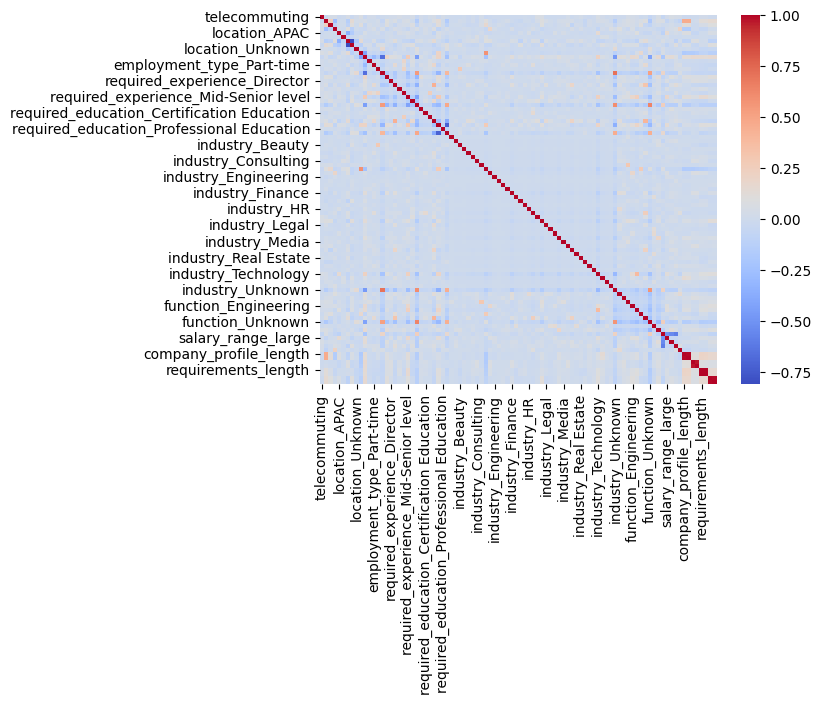

In [114]:
corr_matrix = df_selected.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")

In [115]:
corr_table = corr_matrix.style.background_gradient(cmap='coolwarm')
display(corr_table)

In [116]:
# compute the correlation coefficients between all variables and the target variable "fraudulent"
corr_with_target = df_selected.corrwith(df_selected['fraudulent']).sort_values(ascending=False)

# create a styled table of the correlation coefficients
corr_table = pd.DataFrame(corr_with_target, columns=['Correlation Coefficient fraudulent'])
corr_table.style.background_gradient(cmap='coolwarm')

In [117]:
feature_corr_threshold = 0.5
high_corr_features = set()

corr_with_target = df_selected.corrwith(df_selected['fraudulent']).sort_values(ascending=False) # correlation between all features and fraudulent(target)
corr_matrix = df_selected.corr() # correlation between features

for col in corr_matrix.columns:
    for idx, val in enumerate(corr_matrix[col]):
        if abs(val) > feature_corr_threshold and idx > corr_matrix.columns.get_loc(col):
            if abs(val) > 0.5:
                if corr_with_target[col] > corr_with_target[corr_matrix.columns[idx]]:
                    high_corr_features.add(col)
                else:
                    high_corr_features.add(corr_matrix.columns[idx])


features_to_remove = list(high_corr_features)
df_selected = df_selected.drop(features_to_remove, axis=1)


In [118]:
print("Features to remove:", features_to_remove)

Features to remove: ['industry_Unknown', 'employment_type_Unknown', 'required_experience_Unknown', 'company_profile_words_amount', 'benefits_words_amount', 'location_Americas', 'salary_range_small', 'description_words_amount', 'employment_type_Contract', 'required_education_Unknown', 'salary_range_medium', 'requirements_words_amount']


In [119]:
df_selected.shape

(14085, 80)

In [120]:
df_selected.head(5)

telecommuting  has_company_logo  has_questions  fraudulent  location_APAC  \
0              0                 1              1           0              1   
1              0                 1              0           0              0   
2              0                 1              0           1              1   
3              0                 1              1           0              0   
4              0                 1              0           0              1   

   location_Africa  location_EMEA  location_Unknown  \
0                0              0                 0   
1                0              0                 0   
2                0              0                 0   
3                0              0                 0   
4                0              0                 0   

   employment_type_Full-time  employment_type_Other  ...  function_Unknown  \
0                          0                      0  ...                 1   
1                          0                      0  ...                 1   
2                          1                      0  ...                 0   
3                          1                      0  ...                 0   
4                          0                      0  ...                 1   

   function_production  function_sales and marketing  salary_range_Unknown  \
0                    0                             0                     1   
1                    0                             0                     1   
2                    0                             0                     0   
3                    0                             0                     1   
4                    0                             0                     1   

   salary_range_large  title_fraud_words  company_profile_length  \
0                   0                  0                0.204597   
1                   0                  0                0.051797   
2                   1                  0                0.055520   
3                   0                  0                0.062156   
4                   0                  0                0.318873   

   description_length  requirements_length  benefits_length  
0            0.003824             0.000000              0.0  
1            0.057221             0.232694              0.0  
2            0.150466             0.103210              0.0  
3            0.146911             0.000000              0.0  
4            0.125914             0.000000              0.0  

[5 rows x 80 columns]

# ---------------------PART B---------------------

In [121]:
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

In [122]:
# Split the data into train and test sets
train_data, test_data = train_test_split(df_selected, test_size=0.2, shuffle=False, random_state=42)

#### Up sampling on the train data

In [123]:
# Separate the fraud and non-fraud samples
fraud_train = train_data[train_data['fraudulent'] == 1]
not_fraud_train = train_data[train_data['fraudulent'] == 0]

# Upsample the fraud samples to increase their representation
fraud_upsampled_train = resample(fraud_train, replace=True, n_samples=int(0.25 * len(not_fraud_train)))

# Combine the upsampled fraud samples with the non-fraud samples
balanced_train_data = pd.concat([not_fraud_train, fraud_upsampled_train])

# Shuffle the data
balanced_data_train = balanced_train_data.sample(frac=1)

In [124]:
balanced_data_train

telecommuting  has_company_logo  has_questions  fraudulent  \
6998              0                 0              0           0   
9072              0                 1              0           0   
8141              0                 1              1           0   
5037              0                 0              0           1   
7862              0                 0              0           0   
...             ...               ...            ...         ...   
9524              0                 0              0           0   
5417              0                 0              0           0   
2207              0                 1              0           0   
6697              0                 0              0           0   
6254              0                 0              0           1   

      location_APAC  location_Africa  location_EMEA  location_Unknown  \
6998              0                0              0                 0   
9072              0                0              0                 0   
8141              0                0              0                 0   
5037              0                0              0                 0   
7862              0                0              0                 0   
...             ...              ...            ...               ...   
9524              0                0              0                 0   
5417              1                0              0                 0   
2207              0                0              0                 0   
6697              0                0              0                 0   
6254              0                0              0                 0   

      employment_type_Full-time  employment_type_Other  ...  function_Unknown  \
6998                          0                      0  ...                 1   
9072                          1                      0  ...                 0   
8141                          0                      0  ...                 1   
5037                          0                      0  ...                 1   
7862                          0                      0  ...                 1   
...                         ...                    ...  ...               ...   
9524                          1                      0  ...                 0   
5417                          1                      0  ...                 0   
2207                          1                      0  ...                 0   
6697                          0                      0  ...                 1   
6254                          1                      0  ...                 0   

      function_production  function_sales and marketing  salary_range_Unknown  \
6998                    0                             0                     1   
9072                    0                             0                     1   
8141                    0                             0                     1   
5037                    0                             0                     1   
7862                    0                             0                     1   
...                   ...                           ...                   ...   
9524                    0                             0                     1   
5417                    0                             0                     1   
2207                    0                             0                     1   
6697                    0                             0                     1   
6254                    0                             0                     1   

      salary_range_large  title_fraud_words  company_profile_length  \
6998                   0                  0                0.000000   
9072                   0                  0                0.112010   
8141                   0                  0                0.008579   
5037                   0                  1                0.000000   
7862       

In [125]:
balanced_data_train['fraudulent'].value_counts()

fraudulent
0    10715
1     2678
Name: count, dtype: int64

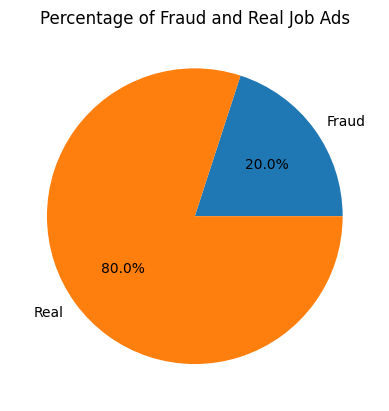

In [126]:
# Count the number of real and fraudulent job ads
fraud_count = balanced_data_train[balanced_data_train['fraudulent']==1].shape[0]
real_count = balanced_data_train[balanced_data_train['fraudulent']==0].shape[0]

# Create a list of counts and labels for the pie chart
counts = [fraud_count, real_count]
labels = ['Fraud', 'Real']

# Create the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Fraud and Real Job Ads')
plt.show()

#### Up sampling on the test data

In [127]:
# Separate the fraud and non-fraud samples
fraud_test = test_data[test_data['fraudulent'] == 1]
not_fraud_test = test_data[test_data['fraudulent'] == 0]

# Upsample the fraud samples to increase their representation
fraud_upsampled_test = resample(fraud_test, replace=True, n_samples=int(0.25 * len(not_fraud_test)))

# Combine the upsampled fraud samples with the non-fraud samples
balanced_test_data = pd.concat([not_fraud_test, fraud_upsampled_test])

# Shuffle the data
balanced_data_test = balanced_test_data.sample(frac=1)

In [128]:
balanced_data_test['fraudulent'].value_counts()

fraudulent
0    2672
1     668
Name: count, dtype: int64

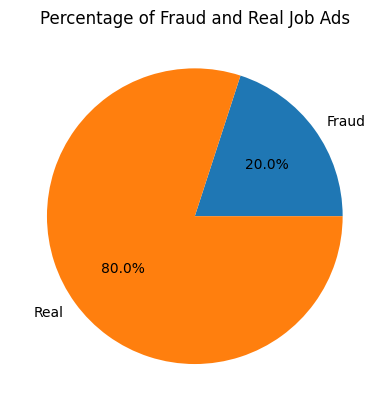

In [129]:
# Count the number of real and fraudulent job ads
fraud_count = balanced_data_test[balanced_data_test['fraudulent']==1].shape[0]
real_count = balanced_data_test[balanced_data_test['fraudulent']==0].shape[0]

# Create a list of counts and labels for the pie chart
counts = [fraud_count, real_count]
labels = ['Fraud', 'Real']

# Create the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Fraud and Real Job Ads')
plt.show()

In [130]:
# Split train set into features and target variables
X_train = balanced_data_train.drop(columns=['fraudulent'])
y_train = balanced_data_train['fraudulent']

# Split test set into features and target variables
X_test = balanced_data_test.drop(columns=['fraudulent'])
y_test = balanced_data_test['fraudulent']

In [131]:
print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

Train size: 13393
Test size: 3340


In [132]:
print("Train\n-----------\n", pd.value_counts(y_train)/y_train.shape[0])
print("\nTest\n-----------\n", pd.value_counts(y_test)/y_test.shape[0])

Train
-----------
 fraudulent
0    0.800045
1    0.199955
Name: count, dtype: float64

Test
-----------
 fraudulent
0    0.8
1    0.2
Name: count, dtype: float64


In [133]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

## Full tree

### Base line model

In [134]:
tree_model = DecisionTreeClassifier(random_state=42)

In [135]:
##training the model over the train set, growing the tree to its full length
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [136]:
##predinting on the train set to calculate train acuracy
print(f"Train ROC_AUC score: {roc_auc_score(y_train, tree_model.predict_proba(X_train)[:,1]):.4}")

##predinting on the test set to calculate test acuracy
print(f"Test ROC_AUC score: {roc_auc_score(y_test, tree_model.predict_proba(X_test)[:,1]):.4}")

Train ROC_AUC score: 1.0
Test ROC_AUC score: 0.8256


In [137]:
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [138]:
tree_model.tree_.max_depth

29

## Hyperparameter tuning - gridserch, Kfold cv

In [139]:
## defining the grid that we want to tune the model according to.
## in this case we will tune max_depth, criterion, max_features.
## we finaly check the number of combinations, which will be the number of different DT models to train.
param_grid_tree = {'max_depth': np.arange(1, tree_model.tree_.max_depth+1, 1),
              'criterion': ['entropy', 'gini'],
              'max_features': ['sqrt', 'log2', None]
             }

comb = 1
for list_ in param_grid_tree.values():
    comb *= len(list_)
print(comb)

174


In [140]:
param_grid_tree.values()

dict_values([array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), ['entropy', 'gini'], ['sqrt', 'log2', None]])

In [141]:
##Grid search will perform a 10-fold CV (cv=10)
grid_search_tree = GridSearchCV(estimator=tree_model,
                           param_grid=param_grid_tree,
                           scoring='roc_auc',
                           refit=True,
                           cv=5)

In [142]:
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'max_features': ['sqrt', 'log2', None]},
             scoring='roc_auc')

In [143]:
results = grid_search_tree.cv_results_

# Create a DataFrame from the cv_results_ dictionary
results_df = pd.DataFrame(results)

# Split the 'params' column into separate columns
params_df = pd.DataFrame(results_df['params'].to_list())

# Concatenate the params_df with mean_test_score column
combined_df = pd.concat([params_df, results_df['mean_test_score']], axis=1)

# Sort the DataFrame by mean_test_score in descending order
combined_df = combined_df.sort_values('mean_test_score', ascending=False)

# Print the sorted table
print(combined_df.head(10))

    criterion  max_depth max_features  mean_test_score
59    entropy         20         None         0.988258
158      gini         24         None         0.988245
85    entropy         29         log2         0.988235
50    entropy         17         None         0.988182
78    entropy         27         sqrt         0.988156
53    entropy         18         None         0.988099
66    entropy         23         sqrt         0.988087
172      gini         29         log2         0.987953
56    entropy         19         None         0.987913
81    entropy         28         sqrt         0.987900


In [144]:
best_model_tree = grid_search_tree.best_estimator_
best_model_tree

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)

In [145]:
best_model_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [146]:
preds_train_tree = best_model_tree.predict_proba(X_train)[:,1]
print("Test roc_auc: ", round(roc_auc_score(y_train, preds_train_tree), 4))

Test roc_auc:  0.9995


In [147]:
preds_test_tree = best_model_tree.predict_proba(X_test)[:,1]
print("Test roc_auc: ", round(roc_auc_score(y_test, preds_test_tree), 4))

Test roc_auc:  0.8622


### feature_importances_

In [148]:

# Get the feature importances
importances = best_model_tree.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance values in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances_df.head(10))

                                     Feature  Importance
75                    company_profile_length    0.321002
76                        description_length    0.121871
77                       requirements_length    0.058154
74                         title_fraud_words    0.057060
33                           industry_Energy    0.053849
78                           benefits_length    0.053109
5                              location_EMEA    0.039925
21  required_education_High School Education    0.038567
72                      salary_range_Unknown    0.021151
1                           has_company_logo    0.020870


### the best model tree

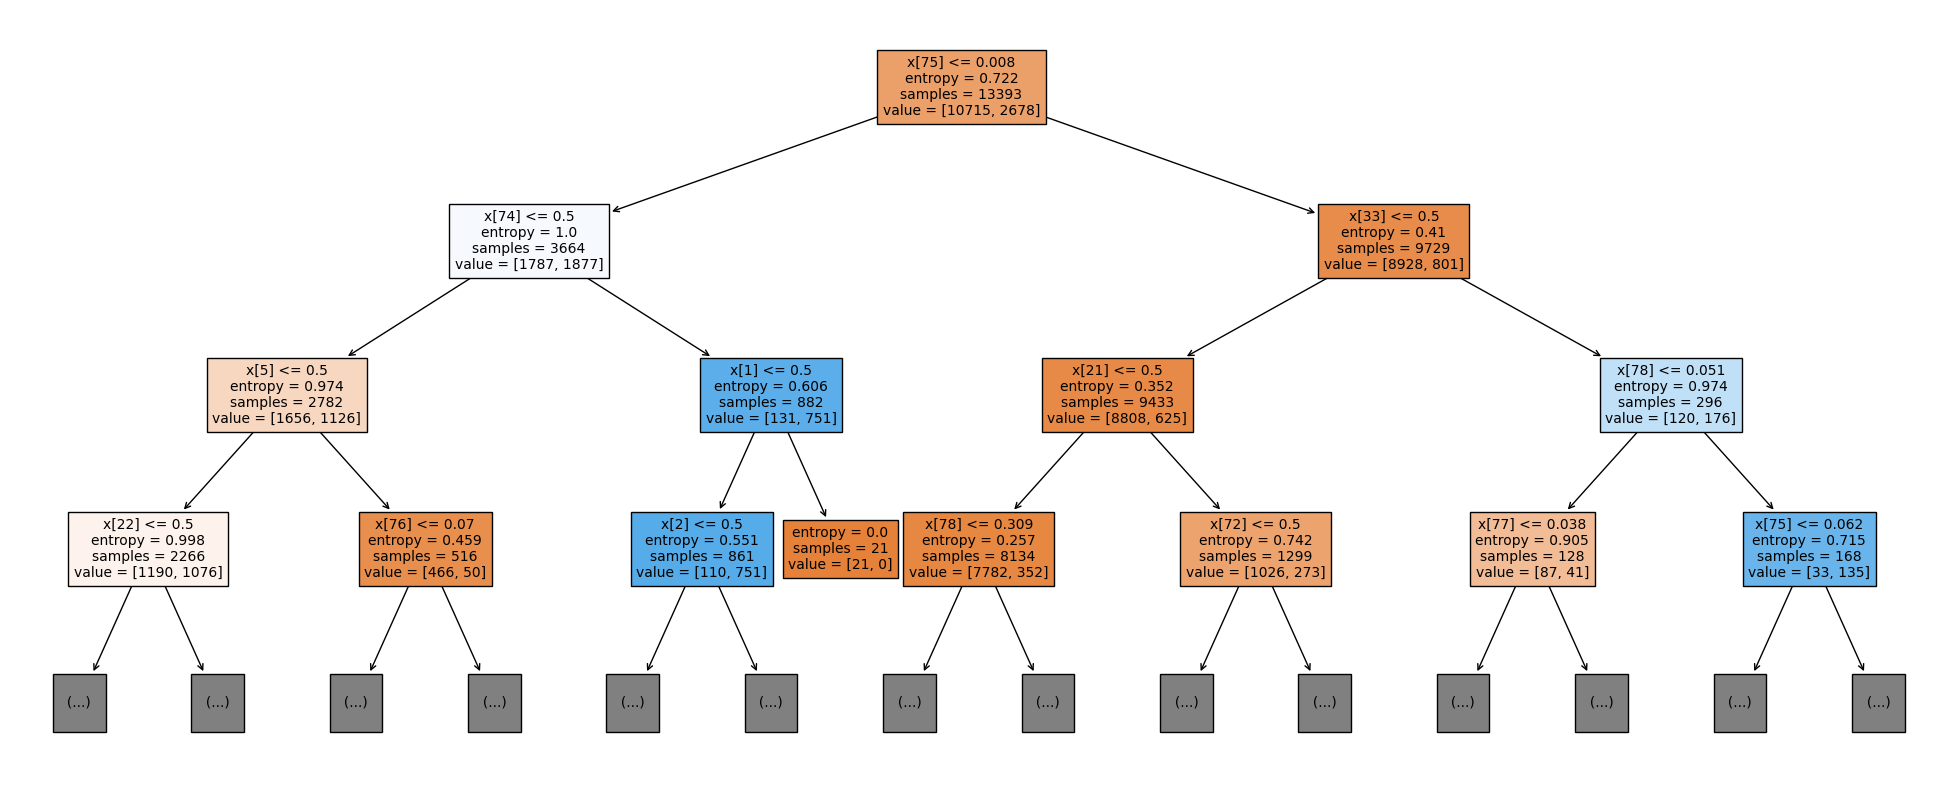

In [149]:
plt.figure(figsize=(25, 10))
plot_tree(best_model_tree, filled=True, max_depth=3, fontsize=10)
plt.show()


## MLP

In [150]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

In [151]:
mlp_model = MLPClassifier(random_state=1)

In [152]:
mlp_model.fit(X_train, y_train)

/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1)

In [153]:
print(f"roc_auc score: {roc_auc_score(y_train, mlp_model.predict_proba(X_train)[:,1]):.4f}")
print(confusion_matrix(y_train, mlp_model.predict(X_train)))

roc_auc score: 0.9992
[[10616    99]
 [   68  2610]]


In [154]:
print(f"roc_auc score: {roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:,1]):.4f}")
print(confusion_matrix(y_test, mlp_model.predict(X_test)))

roc_auc score: 0.9350
[[2617   55]
 [ 219  449]]


### Default MLP Model - change in max_iter

In [155]:
mlp_model = MLPClassifier(random_state=1, max_iter = 1000)

In [156]:
mlp_model.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=1)

In [157]:
print(f"Train roc_auc score: {roc_auc_score(y_train, mlp_model.predict_proba(X_train)[:,1]):.4f}")
print(confusion_matrix(y_train, mlp_model.predict(X_train)))

Train roc_auc score: 0.9993
[[10663    52]
 [  101  2577]]


In [158]:
print(f"Test roc_auc score: {roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:,1]):.4f}")
print(confusion_matrix(y_test, mlp_model.predict(X_test)))

Test roc_auc score: 0.9357
[[2627   45]
 [ 212  456]]


In [159]:
mlp_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

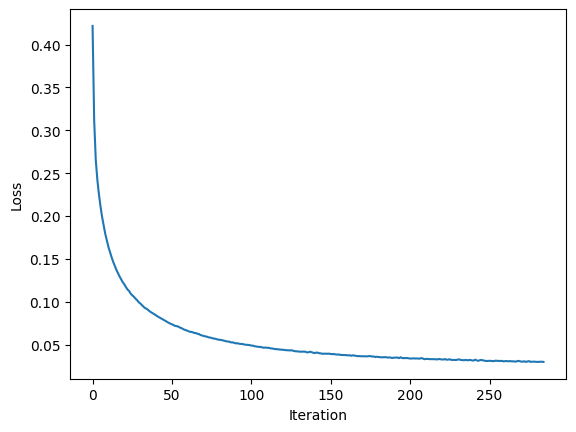

In [160]:
# loss
plt.plot(mlp_model.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

## Hyperparameter tuning MLP

### hidden_layer_sizes tuning

 1 layer 2-78 nodes

In [161]:
oneLys_train_roc_aucs = []
oneLys_test_roc_aucs = []
onesizes = range(2, 79, 4)
for size_ in onesizes:
    print(f"size: {size_}")
    mlp_model = MLPClassifier(random_state=1,
                          hidden_layer_sizes=(size_),
                          max_iter=1000,
                          verbose=False)
    mlp_model.fit(X_train, y_train)
    train_roc_auc = mlp_model.score(X_train, y_train)
    oneLys_train_roc_aucs.append(train_roc_auc)
    test_roc_auc = mlp_model.score(X_test, y_test)
    oneLys_test_roc_aucs.append(test_roc_auc)

size: 2
size: 6
size: 10
size: 14
size: 18
size: 22
size: 26
size: 30
size: 34
size: 38
size: 42
size: 46
size: 50
size: 54
size: 58
size: 62
size: 66
size: 70
size: 74
size: 78


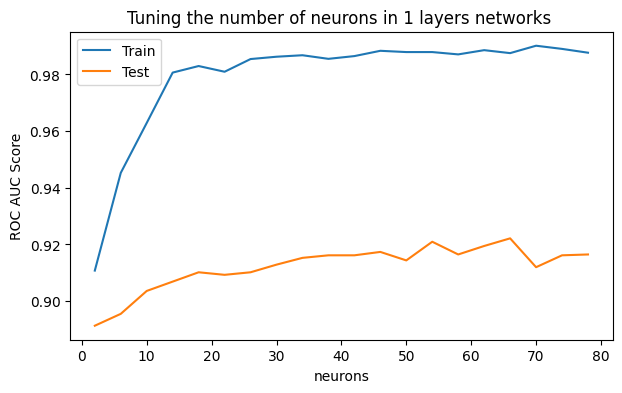

In [162]:
plt.figure(figsize=(7, 4))
plt.plot(range(2, 79, 4), oneLys_train_roc_aucs, label='Train')
plt.plot(range(2, 79, 4), oneLys_test_roc_aucs, label='Test')
plt.legend()
plt.xlabel('neurons')
plt.ylabel('ROC AUC Score')
plt.title('Tuning the number of neurons in 1 layers networks ')
plt.show()

In [163]:
onemax_test_roc_auc = max(oneLys_test_roc_aucs)
onemax_index = oneLys_test_roc_aucs.index(onemax_test_roc_auc)
oneoptimal_nodes = onesizes[onemax_index]

print("Optimal Number of Nodes:", oneoptimal_nodes)
print("Maximum ROC AUC Score:", onemax_test_roc_auc)

Optimal Number of Nodes: 66
Maximum ROC AUC Score: 0.9221556886227545


 2 layers 2-78 nodes each

In [164]:
twoLys_train_roc_aucs = []
twoLys_test_roc_aucs = []
twosizes = range(2, 79, 4)
for size_ in twosizes:
    print(f"size: {size_}")
    mlp_model = MLPClassifier(random_state=1,
                          hidden_layer_sizes=(size_, size_),
                          max_iter=1000,
                          verbose=False)
    mlp_model.fit(X_train, y_train)
    train_roc_auc = mlp_model.score(X_train, y_train)
    twoLys_train_roc_aucs.append(train_roc_auc)
    test_roc_auc = mlp_model.score(X_test, y_test)
    twoLys_test_roc_aucs.append(test_roc_auc)

size: 2
size: 6
size: 10
size: 14
size: 18
size: 22
size: 26
size: 30
size: 34
size: 38
size: 42
size: 46
size: 50
size: 54
size: 58
size: 62
size: 66
size: 70
size: 74
size: 78


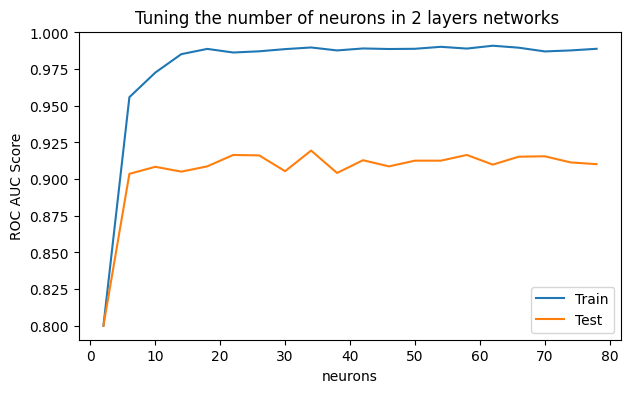

In [165]:
plt.figure(figsize=(7, 4))
plt.plot(range(2, 79, 4), twoLys_train_roc_aucs, label='Train')
plt.plot(range(2, 79, 4), twoLys_test_roc_aucs, label='Test')
plt.legend()
plt.xlabel('neurons')
plt.ylabel('ROC AUC Score')
plt.title('Tuning the number of neurons in 2 layers networks ')
plt.show()

In [166]:
twomax_test_roc_auc = max(twoLys_test_roc_aucs)
twomax_index = twoLys_test_roc_aucs.index(twomax_test_roc_auc)
twooptimal_nodes = twosizes[twomax_index]

print("Optimal Number of Nodes:", twooptimal_nodes)
print("Maximum ROC AUC Score:", twomax_test_roc_auc)

Optimal Number of Nodes: 34
Maximum ROC AUC Score: 0.9194610778443114


 3 layers 2-78 nodes each

In [167]:
threeLys_train_roc_aucs = []
threeLys_test_roc_aucs = []
sizes = range(2, 79, 4)
for size_ in sizes:
    print(f"size: {size_}")
    mlp_model = MLPClassifier(random_state=1,
                          hidden_layer_sizes=(size_, size_, size_),
                          max_iter=1000,
                          verbose=False)
    mlp_model.fit(X_train, y_train)
    train_roc_auc = mlp_model.score(X_train, y_train)
    threeLys_train_roc_aucs.append(train_roc_auc)
    test_roc_auc = mlp_model.score(X_test, y_test)
    threeLys_test_roc_aucs.append(test_roc_auc)

size: 2
size: 6
size: 10
size: 14
size: 18
size: 22
size: 26
size: 30
size: 34
size: 38
size: 42
size: 46
size: 50
size: 54
size: 58
size: 62
size: 66
size: 70
size: 74
size: 78


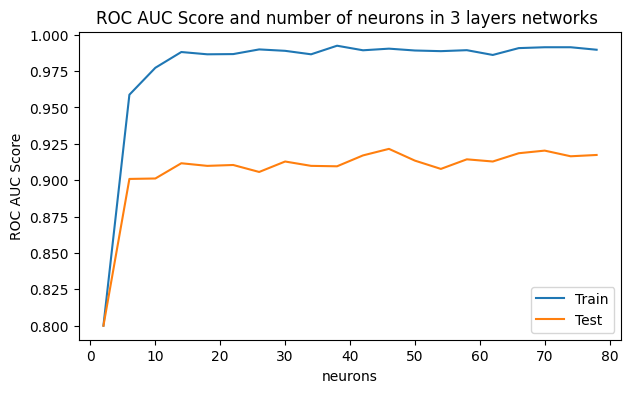

In [168]:
plt.figure(figsize=(7, 4))
plt.plot(range(2, 79, 4), threeLys_train_roc_aucs, label='Train')
plt.plot(range(2, 79, 4), threeLys_test_roc_aucs, label='Test')
plt.legend()
plt.xlabel('neurons')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score and number of neurons in 3 layers networks ')
plt.show()

In [169]:
max_test_roc_auc = max(threeLys_test_roc_aucs)
max_index = threeLys_test_roc_aucs.index(max_test_roc_auc)
optimal_nodes = sizes[max_index]

print("Optimal Number of Nodes:", optimal_nodes)
print("Maximum ROC AUC Score:", max_test_roc_auc)

Optimal Number of Nodes: 46
Maximum ROC AUC Score: 0.921556886227545


Activation tuning

In [170]:
activation_train_roc_aucs = []
activation_test_roc_aucs = []

activations = ['identity', 'logistic', 'tanh', 'relu']

for activation in activations:
    mlp_model = MLPClassifier(random_state=1,
                              activation=activation,
                              max_iter=1000,
                              verbose=False)
    mlp_model.fit(X_train, y_train)
    train_roc_auc = mlp_model.score(X_train, y_train)
    activation_train_roc_aucs.append(train_roc_auc)
    test_roc_auc = mlp_model.score(X_test, y_test)
    activation_test_roc_aucs.append(test_roc_auc)


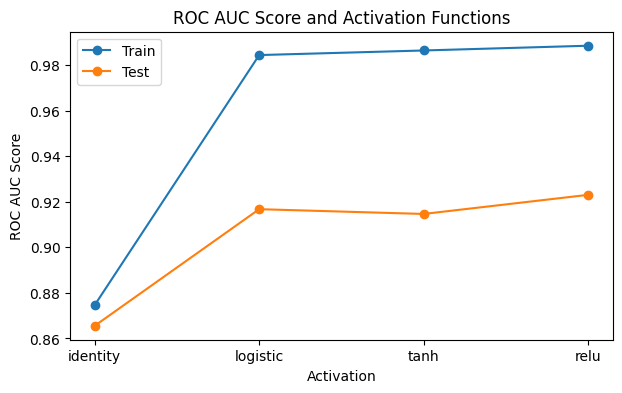

In [171]:
plt.figure(figsize=(7, 4))
plt.plot(activations, activation_train_roc_aucs, marker='o', label='Train')
plt.plot(activations, activation_test_roc_aucs, marker='o', label='Test')
plt.legend()
plt.xlabel('Activation')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score and Activation Functions')
plt.show()

In [172]:
actmax_test_roc_auc = max(activation_test_roc_aucs)
actmax_index = activation_test_roc_aucs.index(actmax_test_roc_auc)
optimal_activation = activations[actmax_index]

print("Optimal Activation Function:", optimal_activation)
print("Maximum ROC AUC Score:", actmax_test_roc_auc)


Optimal Activation Function: relu
Maximum ROC AUC Score: 0.9230538922155689


learning rate tuning

In [173]:
lr_train_roc_aucs = []
lr_test_roc_aucs = []

learning_rates = [0.1, 0.01, 0.001, 0.0001]

for learning_rate in learning_rates:
    mlp_model = MLPClassifier(random_state=1,
                              learning_rate_init=learning_rate,
                              max_iter=1000,
                              verbose=False)
    mlp_model.fit(X_train, y_train)
    train_roc_auc = mlp_model.score(X_train, y_train)
    lr_train_roc_aucs.append(train_roc_auc)
    test_roc_auc = mlp_model.score(X_test, y_test)
    lr_test_roc_aucs.append(test_roc_auc)


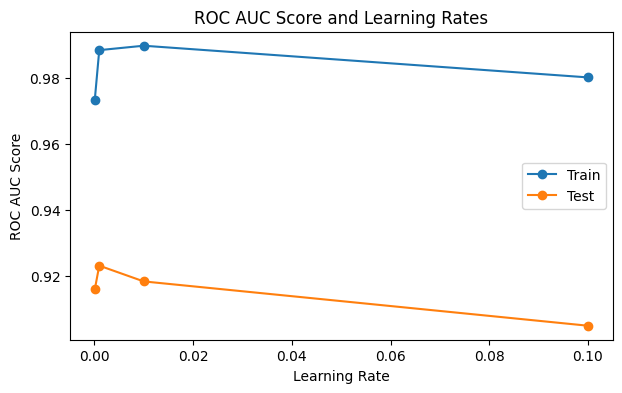

In [174]:
plt.figure(figsize=(7, 4))
plt.plot(learning_rates, lr_train_roc_aucs, marker='o', label='Train')
plt.plot(learning_rates, lr_test_roc_aucs, marker='o', label='Test')
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score and Learning Rates')
plt.show()


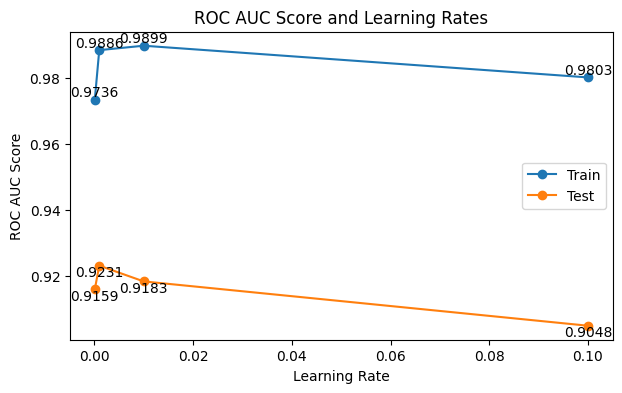

In [175]:
plt.figure(figsize=(7, 4))
plt.plot(learning_rates, lr_train_roc_aucs, marker='o', label='Train')
plt.plot(learning_rates, lr_test_roc_aucs, marker='o', label='Test')

# Add the scores as text annotations
for i in range(len(learning_rates)):
    plt.text(learning_rates[i], lr_train_roc_aucs[i], f"{lr_train_roc_aucs[i]:.4f}", ha='center', va='bottom')
    plt.text(learning_rates[i], lr_test_roc_aucs[i], f"{lr_test_roc_aucs[i]:.4f}", ha='center', va='top')

plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score and Learning Rates')
plt.show()


In [176]:
lrmax_test_roc_auc = max(lr_test_roc_aucs)
lrmax_index = lr_test_roc_aucs.index(lrmax_test_roc_auc)
optimal_learning_rate = learning_rates[lrmax_index]

print("Optimal Learning Rate:", optimal_learning_rate)
print("Maximum ROC AUC Score:", lrmax_test_roc_auc)


Optimal Learning Rate: 0.001
Maximum ROC AUC Score: 0.9230538922155689


### grid search mlp

In [177]:

# Generate the parameter grid
param_grid_mlp = {
    'hidden_layer_sizes': [[10],[20],[30], [10,10],[20,20],[30,30],[10,10,10],[20,20,20],[30,30,30]],
    'activation': ['logistic', 'tanh', 'relu'],
    'learning_rate_init': [0.1, 0.01, 0.001,0.0001]
}

comb = 1
for list_ in param_grid_mlp.values():
    comb *= len(list_)
print(comb)

108


In [178]:
param_grid_mlp.values()

dict_values([[[10], [20], [30], [10, 10], [20, 20], [30, 30], [10, 10, 10], [20, 20, 20], [30, 30, 30]], ['logistic', 'tanh', 'relu'], [0.1, 0.01, 0.001, 0.0001]])

In [179]:
# Perform grid search
grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=5 , scoring='roc_auc')

In [180]:
grid_search_mlp.fit(X_train, y_train)

/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached 

GridSearchCV(cv=5,
             estimator=MLPClassifier(learning_rate_init=0.0001, max_iter=1000,
                                     random_state=1),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [[10], [20], [30], [10, 10],
                                                [20, 20], [30, 30],
                                                [10, 10, 10], [20, 20, 20],
                                                [30, 30, 30]],
                         'learning_rate_init': [0.1, 0.01, 0.001, 0.0001]},
             scoring='roc_auc')

In [181]:
results_mlp = grid_search_mlp.cv_results_

# Create a DataFrame from the cv_results_ dictionary
results_df_mlp = pd.DataFrame(results_mlp)

# Split the 'params' column into separate columns
params_df_mlp = pd.DataFrame(results_df_mlp['params'].to_list())

# Concatenate the params_df with mean_test_score column
combined_df_mlp = pd.concat([params_df_mlp, results_df_mlp['mean_test_score']], axis=1)

# Sort the DataFrame by mean_test_score in descending order
combined_df_mlp = combined_df_mlp.sort_values('mean_test_score', ascending=False)

# Print the sorted table
print(combined_df_mlp.head(10))

   activation hidden_layer_sizes  learning_rate_init  mean_test_score
57       tanh           [30, 30]               0.010         0.995709
46       tanh               [30]               0.001         0.995625
45       tanh               [30]               0.010         0.995489
53       tanh           [20, 20]               0.010         0.995481
58       tanh           [30, 30]               0.001         0.995442
9    logistic               [30]               0.010         0.995426
5    logistic               [20]               0.010         0.995093
41       tanh               [20]               0.010         0.994961
82       relu               [30]               0.001         0.994881
93       relu           [30, 30]               0.010         0.994720


In [182]:
# Get the best model and its performance
best_model_mlp = grid_search_mlp.best_estimator_
best_score_mlp = grid_search_mlp.best_score_

print("Best Model:", best_model_mlp)
print("Best ROC AUC Score:", best_score_mlp)


Best Model: MLPClassifier(activation='tanh', hidden_layer_sizes=[30, 30],
              learning_rate_init=0.01, max_iter=1000, random_state=1)
Best ROC AUC Score: 0.9957089241430493


In [183]:
print(f"Train roc_auc score: {roc_auc_score(y_train, best_model_mlp.predict_proba(X_train)[:,1]):.4f}")
print(confusion_matrix(y_train, best_model_mlp.predict(X_train)))

Train roc_auc score: 0.9998
[[10665    50]
 [   50  2628]]


In [184]:
print(f"Test roc_auc score: {roc_auc_score(y_test, best_model_mlp.predict_proba(X_test)[:,1]):.4f}")
print(confusion_matrix(y_test, best_model_mlp.predict(X_test)))

Test roc_auc score: 0.9394
[[2615   57]
 [ 215  453]]


### SVM

In [185]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, confusion_matrix

In [186]:
svm_model = SVC(kernel='linear', probability=True)

In [187]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [188]:
# Calculate ROC-AUC and confusion matrix on the training set
train_roc_auc = roc_auc_score(y_train, svm_model.predict_proba(X_train)[:, 1])
train_confusion_matrix = confusion_matrix(y_true=y_train, y_pred=svm_model.predict(X_train))

print(f"Train ROC-AUC: {train_roc_auc:.3f}")
print("Confusion Matrix (Train):\n", train_confusion_matrix)

Train ROC-AUC: 0.918
Confusion Matrix (Train):
 [[10300   415]
 [ 1192  1486]]


In [189]:
# Calculate ROC-AUC and confusion matrix on the test set
test_roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])
test_confusion_matrix = confusion_matrix(y_true=y_test, y_pred=svm_model.predict(X_test))

print(f"Test ROC-AUC: {test_roc_auc:.3f}")
print("Confusion Matrix (Test):\n", test_confusion_matrix)

Test ROC-AUC: 0.893
Confusion Matrix (Test):
 [[2554  118]
 [ 316  352]]


### SVM Hyperprameters Tuning

In [190]:
param_grid_svm = {'C': [0.01, 0.1, 1]}  # Specify the range of hyperparameters 

In [191]:
grid_search_svm = GridSearchCV(svm_model, param_grid_svm ,scoring='roc_auc',
                           refit=True,cv=5)  

In [192]:
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': [0.01, 0.1, 1]}, scoring='roc_auc')

In [193]:
results_svm = grid_search_svm.cv_results_

# Create a DataFrame from the cv_results_ dictionary
results_df_svm = pd.DataFrame(results_svm)

# Split the 'params' column into separate columns
params_df_svm = pd.DataFrame(results_df_svm['params'].to_list())

# Concatenate the params_df with mean_test_score column
combined_df_svm = pd.concat([params_df_svm, results_df_svm['mean_test_score']], axis=1)

# Sort the DataFrame by mean_test_score in descending order
combined_df_svm = combined_df_svm.sort_values('mean_test_score', ascending=False)

# Print the sorted table
print(combined_df_svm.head(10))

      C  mean_test_score
2  1.00         0.915815
1  0.10         0.911048
0  0.01         0.892093


In [194]:
best_model_svm = grid_search_svm.best_estimator_
best_model_svm

SVC(C=1, kernel='linear', probability=True)

In [195]:
best_params = grid_search_svm.best_params_
best_params

{'C': 1}

In [196]:
best_score = grid_search_svm.best_score_
best_score

0.9158152889309866

In [197]:
# Calculate ROC-AUC and confusion matrix on the training set
train_roc_auc = roc_auc_score(y_train, best_model_svm.predict_proba(X_train)[:, 1])
train_confusion_matrix = confusion_matrix(y_true=y_train, y_pred=best_model_svm.predict(X_train))

print(f"Train ROC-AUC: {train_roc_auc:.3f}")
print("Confusion Matrix (Train):\n", train_confusion_matrix)

Train ROC-AUC: 0.918
Confusion Matrix (Train):
 [[10300   415]
 [ 1192  1486]]


In [198]:
# Calculate ROC-AUC and confusion matrix on the test set
test_roc_auc = roc_auc_score(y_test, best_model_svm.predict_proba(X_test)[:, 1])
test_confusion_matrix = confusion_matrix(y_true=y_test, y_pred=best_model_svm.predict(X_test))

print(f"Test ROC-AUC: {test_roc_auc:.3f}")
print("Confusion Matrix (Test):\n", test_confusion_matrix)

Test ROC-AUC: 0.893
Confusion Matrix (Test):
 [[2554  118]
 [ 316  352]]


### Print the coefficients of the svm decision function 

In [199]:
print(best_model_svm.coef_)
print(best_model_svm.intercept_)
## The weights(coefficients) represent the seperating hyperplane,
## by giving you the coordinates of a vector which is orthogonal to the hyperplane 

[[ 0.41171115 -1.06383216 -0.05272202  0.27249784 -1.10677922 -1.07255069
   0.26253954 -0.22700911  0.60875085  0.0227592  -0.89459402 -0.59619237
   0.19145305 -0.06897048  0.07751081 -0.45780809 -0.00946991 -0.10517851
  -0.47738976  0.63592783 -0.34167202  0.63872158 -0.17789672 -1.07245202
  -0.43437349  0.1665363  -1.17408289  0.96591686 -0.02380655 -1.
   0.34815038 -0.00961827 -1.62533136  1.74154656  0.55103047 -1.
  -1.         -0.72410586  0.42291457 -0.9002696  -1.26841185  0.07510612
  -0.04880926  0.54879592  0.25246133 -2.29529218 -1.26407902 -0.44700382
  -0.01122513  0.59867102  0.63983959 -0.53231578  0.85330661 -0.82279252
   0.92345876 -0.06783719  0.10696143 -0.5076652  -0.50673879  0.69754813
  -0.73183885  1.65303313  0.33326955  0.22466643 -0.60637888  1.07863299
   0.15872486  0.32056102 -0.32447146 -0.29659728 -0.54099997 -0.34740727
  -0.50495289 -0.63789887  1.26237248 -3.17440563 -1.36059629 -1.21600051
   2.78109849]]
[0.27796336]


In [200]:
best_model_svm.coef_.max()

2.781098489082031

In [201]:
coefficients = best_model_svm.coef_

In [202]:
# Find the feature with the largest coefficient
largest_coef_index = np.argmax(np.abs(coefficients))

In [203]:
largest_coef_index

75

In [204]:
feature_with_largest_coef = X_train.columns[largest_coef_index]

In [205]:
feature_with_largest_coef

'company_profile_length'

### Dimention reduction - PCA - For vizualization

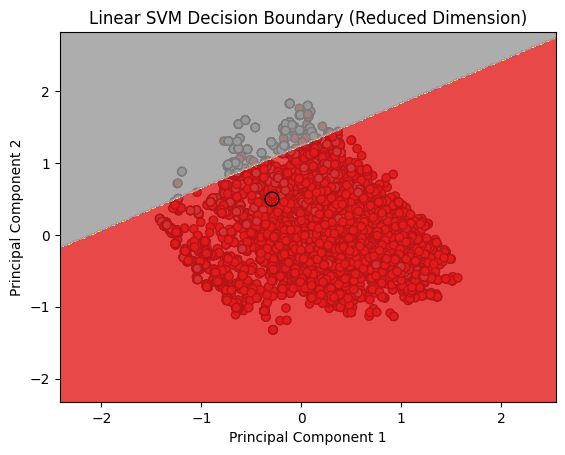

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC

# Reduce the dimensionality using PCA on the training data
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)

# Reduce the dimensionality of the test data using the trained PCA
X_test_reduced = pca.transform(X_test)

# Train the linear SVM model on the reduced training data
svm_reduced = LinearSVC(C=0.1)
svm_reduced.fit(X_train_reduced, y_train)

# Create a meshgrid of points to evaluate the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X_train_reduced[:, 0].min() - 1, X_train_reduced[:, 0].max() + 1
y_min, y_max = X_train_reduced[:, 1].min() - 1, X_train_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class labels for the meshgrid points
Z = svm_reduced.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot of the reduced training data points
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k')

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)

# Plot the support vectors
plt.scatter(svm_reduced.coef_[:, 0], svm_reduced.coef_[:, 1], s=100, facecolors='none', edgecolors='k')

# Set the plot labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Linear SVM Decision Boundary (Reduced Dimension)')

# Show the plot
plt.show()

# Classify the test data using the trained SVM model
y_test_pred = svm_reduced.predict(X_test_reduced)

In [207]:
# Calculate ROC-AUC and confusion matrix on the test set
test_roc_auc = roc_auc_score(y_test, svm_reduced.predict(X_test_reduced))
test_confusion_matrix = confusion_matrix(y_true=y_test, y_pred=svm_reduced.predict(X_test_reduced))

print(f"Test ROC-AUC: {test_roc_auc:.3f}")
print("Confusion Matrix (Test):\n", test_confusion_matrix)

Test ROC-AUC: 0.577
Confusion Matrix (Test):
 [[2655   17]
 [ 561  107]]


## K medoids

### choosing features subset

In [208]:
df_k = balanced_data_train[['company_profile_length','description_length'
                           ,'benefits_length','requirements_length','fraudulent']]

### reducing the dimension

In [209]:
pca_k = PCA(n_components=2)

In [210]:
pca_k.fit(df_k.drop('fraudulent', axis=1))

PCA(n_components=2)

### creating data frame with the feateres and target variable

In [211]:
df_kmedoids_pca = pca_k.transform(df_k.drop('fraudulent', axis = 1))

In [212]:
df_kmedoids_pca = pd.DataFrame(df_kmedoids_pca, columns=['PC1', 'PC2'])

In [213]:
df_k = df_k.reset_index(drop=True)

In [214]:
df_kmedoids_pca['fraudulent'] = df_k['fraudulent']

In [215]:
df_kmedoids_pca

PC1       PC2  fraudulent
0     -0.140052 -0.010492           0
1      0.121077 -0.098403           0
2     -0.119033 -0.017906           0
3     -0.089131 -0.000849           1
4     -0.090580 -0.006830           0
...         ...       ...         ...
13388 -0.034345 -0.066591           0
13389 -0.085169 -0.038366           0
13390 -0.065581  0.076324           0
13391 -0.135516 -0.010156           0
13392 -0.139951 -0.010485           1

[13393 rows x 3 columns]

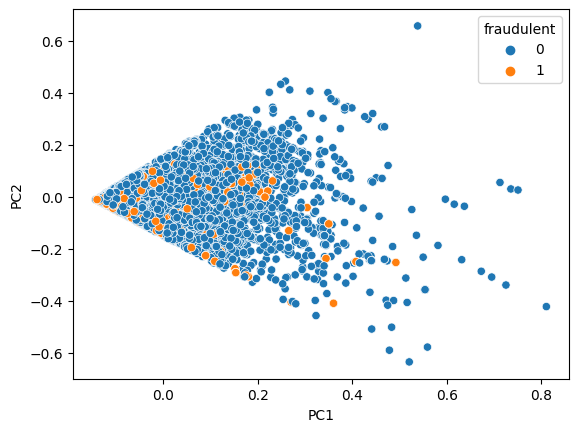

In [216]:
sns.scatterplot(x='PC1', y='PC2', hue='fraudulent', data=df_kmedoids_pca)
plt.show()

In [217]:
pip install scikit-learn-extra


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [218]:
from sklearn_extra.cluster import KMedoids

### defining the model - 2 clusters

In [219]:
kmedoids = KMedoids(n_clusters=2, metric='manhattan',random_state=42)
kmedoids.fit(df_k.drop('fraudulent', axis = 1))

KMedoids(metric='manhattan', n_clusters=2, random_state=42)

In [220]:
kmedoids.predict(df_k.drop('fraudulent', axis = 1))

array([0, 1, 0, ..., 0, 0, 0])

In [221]:
df_kmedoids_pca['cluster'] = kmedoids.predict(df_k.drop('fraudulent', axis = 1))

In [222]:
kmedoids.cluster_centers_

array([[0.        , 0.04675656, 0.        , 0.02265576],
       [0.12382648, 0.07506541, 0.04312486, 0.11123348]])

/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


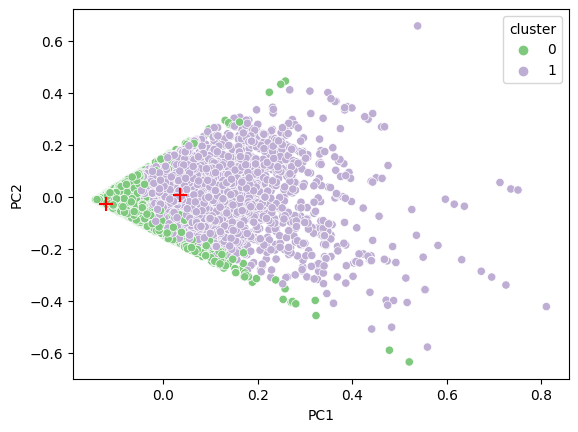

In [223]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_kmedoids_pca, palette='Accent')
plt.scatter(pca_k.transform(kmedoids.cluster_centers_)[:, 0], pca_k.transform(kmedoids.cluster_centers_)[:, 1], marker='+', s=100 ,color='red')
plt.show()

### 3 clusters

In [224]:
kmedoids3 = KMedoids(n_clusters=3,metric='manhattan', random_state=42)

In [225]:
kmedoids3.fit(df_k.drop('fraudulent', axis = 1))

KMedoids(metric='manhattan', n_clusters=3, random_state=42)

In [226]:
kmedoids3.cluster_centers_

array([[0.        , 0.04675656, 0.        , 0.02265576],
       [0.14227905, 0.05219025, 0.        , 0.03949025],
       [0.1113629 , 0.09639767, 0.0616392 , 0.13499056]])

In [227]:
kmedoids3.predict(df_k.drop('fraudulent', axis = 1))

array([0, 2, 0, ..., 1, 0, 0])

In [228]:
df_kmedoids_pca['cluster3'] = kmedoids3.predict(df_k.drop('fraudulent', axis = 1))

/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


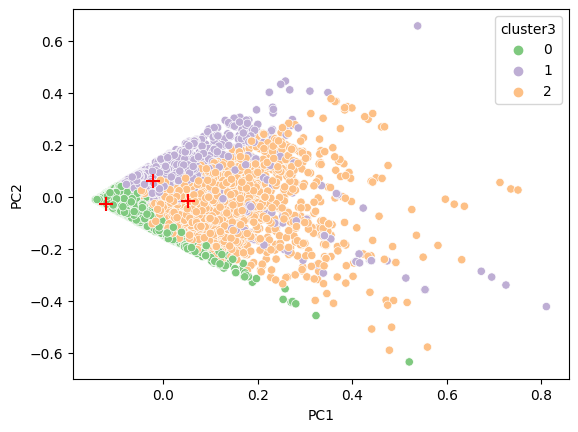

In [229]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster3', data=df_kmedoids_pca, palette='Accent')
plt.scatter(pca_k.transform(kmedoids3.cluster_centers_)[:, 0], pca_k.transform(kmedoids3.cluster_centers_)[:, 1], marker='+', s=100 ,color='red')
plt.show()

### 4 clusters

In [230]:
kmedoids4 = KMedoids(n_clusters=4,metric='manhattan', random_state=42)

In [231]:
kmedoids4.fit(df_k.drop('fraudulent', axis = 1))

KMedoids(metric='manhattan', n_clusters=4, random_state=42)

In [232]:
kmedoids4.cluster_centers_

array([[0.        , 0.04675656, 0.        , 0.02265576],
       [0.14227905, 0.05219025, 0.        , 0.03949025],
       [0.11071544, 0.08787818, 0.        , 0.156073  ],
       [0.11055358, 0.09082981, 0.12621359, 0.09628697]])

In [233]:
kmedoids4.predict(df_k.drop('fraudulent', axis = 1))

array([0, 2, 0, ..., 1, 0, 0])

In [234]:
df_kmedoids_pca['cluster4'] = kmedoids4.predict(df_k.drop('fraudulent',axis = 1))

/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.0.0/libexec/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


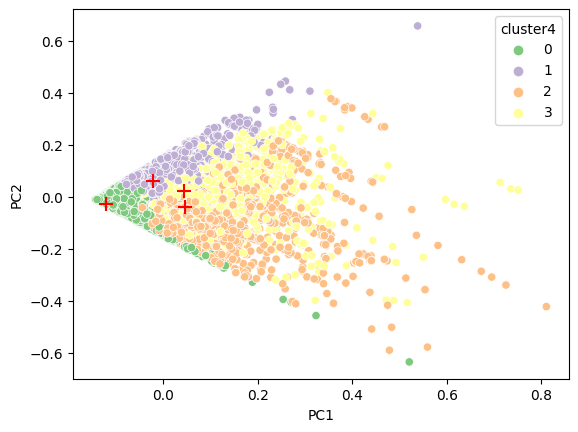

In [235]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster4', data=df_kmedoids_pca, palette='Accent')
plt.scatter(pca_k.transform(kmedoids4.cluster_centers_)[:, 0], pca_k.transform(kmedoids4.cluster_centers_)[:, 1], marker='+', s=100 ,color='red')
plt.show()

## How many clusters ?

In [236]:
from tqdm import tqdm
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [237]:
iner_list = []
dbi_list = []
sil_list = []

for n_clusters in tqdm(range(2, 10, 1)):
    kmedoids = KMedoids(n_clusters=n_clusters,metric='manhattan', max_iter=300, random_state=42)
    kmedoids.fit(df_k.drop('fraudulent', axis = 1))
    assignment = kmedoids.predict(df_k.drop('fraudulent', axis = 1))
    
    iner = kmedoids.inertia_
    sil = silhouette_score(df_k.drop('fraudulent', axis = 1), assignment)
    dbi = davies_bouldin_score(df_k.drop('fraudulent', axis = 1), assignment)
    
    dbi_list.append(dbi)
    sil_list.append(sil)
    iner_list.append(iner)

100%|█████████████████████████████████████████████| 8/8 [00:29<00:00,  3.75s/it]


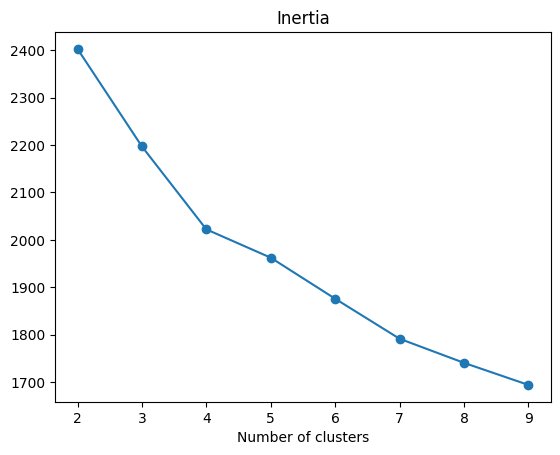

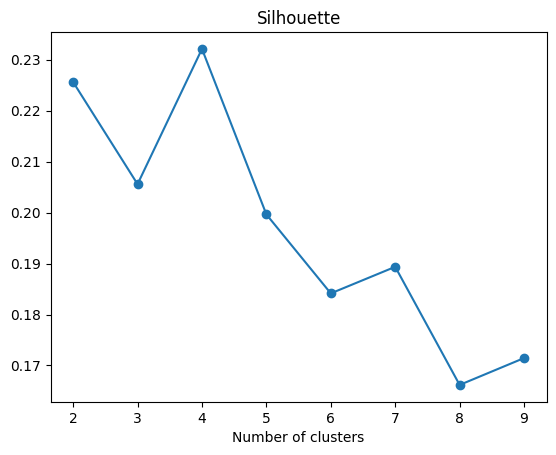

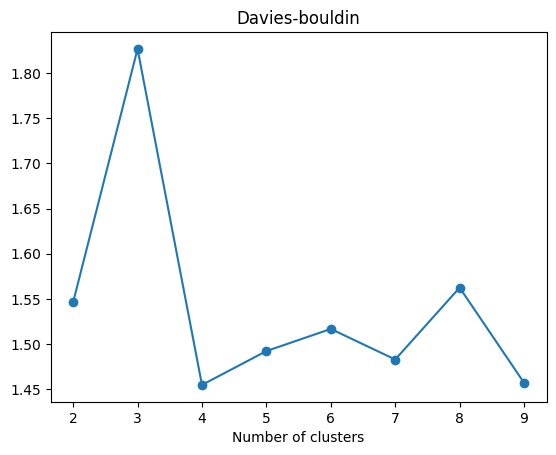

In [238]:
plt.plot(range(2, 10, 1), iner_list, marker='o')
plt.title("Inertia")
plt.xlabel("Number of clusters")
plt.show()

plt.plot(range(2, 10, 1), sil_list, marker='o')
plt.title("Silhouette")
plt.xlabel("Number of clusters")
plt.show()

plt.plot(range(2, 10, 1), dbi_list, marker='o')
plt.title("Davies-bouldin")
plt.xlabel("Number of clusters")
plt.show()

## Improvements

### Data Improvements

In [239]:
from sklearn.preprocessing import PolynomialFeatures

In [240]:
# Assuming you have your feature matrix in a pandas DataFrame called 'df'
features = df_selected[[
       'employment_type_Full-time', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Temporary',
       'required_experience_Associate', 'required_experience_Director',
       'required_experience_Entry level', 'required_experience_Executive',
       'required_experience_Internship',
       'required_experience_Mid-Senior level',
       'required_experience_Not Applicable',
       'required_education_Associate Education',
       'required_education_Certification Education',
       'required_education_College Education',
       'required_education_High School Education',
       'required_education_Higher Education',
       'required_education_Professional Education', 'industry_Architecture',
       'industry_Automotive', 'industry_Beauty', 'industry_Biotech',
       'industry_Business', 'industry_Construction', 'industry_Consulting',
       'industry_Design', 'industry_Education', 'industry_Energy',
       'industry_Engineering', 'industry_Environment', 'industry_Events',
       'industry_Fashion', 'industry_Finance', 'industry_Food',
       'industry_Gaming', 'industry_Government', 'industry_HR',
       'industry_Healthcare', 'industry_Insurance', 'industry_Internet',
       'industry_Legal', 'industry_Logistics', 'industry_Manufacturing',
       'industry_Marketing', 'industry_Media', 'industry_Nonprofit',
       'industry_Other Services', 'industry_Printing', 'industry_Real Estate',
       'industry_Research', 'industry_Retail', 'industry_Security',
       'industry_Technology', 'industry_Telecom', 'industry_Transportation',
       'industry_Travel', 'function_Admin', 'function_Business',
       'function_Creative', 'function_Engineering', 'function_IT and Data',
       'function_Other', 'function_Services', 'function_Unknown',
       'function_production', 'function_sales and marketing',
       'salary_range_Unknown', 'salary_range_large', 'title_fraud_words']]
features

employment_type_Full-time  employment_type_Other  \
0                              0                      0   
1                              0                      0   
2                              1                      0   
3                              1                      0   
4                              0                      0   
...                          ...                    ...   
14299                          1                      0   
14300                          1                      0   
14301                          1                      0   
14302                          1                      0   
14303                          1                      0   

       employment_type_Part-time  employment_type_Temporary  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
14299                          0                          0   
14300                          0                          0   
14301                          0                          0   
14302                          0                          0   
14303                          0                          0   

       required_experience_Associate  required_experience_Director  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   
...                              ...                           ...   
14299                              0                             0   
14300                              0                             0   
14301                              0                             0   
14302                              0                             0   
14303                              0                             0   

       required_experience_Entry level  required_experience_Executive  \
0                                    0                              0   
1                                    0                              0   
2                                    0                              1   
3                                    0                              0   
4                                    0                              0   
...                                ...                            ...   
14299                                0                              0   
14300                                0                              0   
14301                                0                              0   
14302                                1                              0   
14303                                0                              0   

       required_experience_Internship  required_experience_Mid-Senior level  \
0                                   0                                     0   
1                                   0                                     0   
2                                   0                                     0   
3                                   0                                     1   
4                                   0                                     0   
...                               ...                                   ...   
14299                               0                                     0   
14300                               0                                     1   
14301                               0                                     0   
14302                            

In [241]:

# Instantiate PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Generate the interaction features
interactions = poly_features.fit_transform(features)

# Get the original feature names
original_feature_names = features.columns

# Generate the names for the interaction features
interaction_feature_names = []

# Iterate through each interaction term and create the feature names
for feature_comb in poly_features.powers_:
    if feature_comb.sum() > 1:
        interaction_feature = "*".join([original_feature_names[i] for i in np.where(feature_comb > 0)[0]])
        interaction_feature_names.append(interaction_feature)

# Create a new DataFrame with the original features and the generated interactions
df_interactions = pd.DataFrame(interactions, columns=list(original_feature_names) + interaction_feature_names)
df_interactions

employment_type_Full-time  employment_type_Other  \
0                            0.0                    0.0   
1                            0.0                    0.0   
2                            1.0                    0.0   
3                            1.0                    0.0   
4                            0.0                    0.0   
...                          ...                    ...   
14080                        1.0                    0.0   
14081                        1.0                    0.0   
14082                        1.0                    0.0   
14083                        1.0                    0.0   
14084                        1.0                    0.0   

       employment_type_Part-time  employment_type_Temporary  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
...                          ...                        ...   
14080                        0.0                        0.0   
14081                        0.0                        0.0   
14082                        0.0                        0.0   
14083                        0.0                        0.0   
14084                        0.0                        0.0   

       required_experience_Associate  required_experience_Director  \
0                                0.0                           0.0   
1                                0.0                           0.0   
2                                0.0                           0.0   
3                                0.0                           0.0   
4                                0.0                           0.0   
...                              ...                           ...   
14080                            0.0                           0.0   
14081                            0.0                           0.0   
14082                            0.0                           0.0   
14083                            0.0                           0.0   
14084                            0.0                           0.0   

       required_experience_Entry level  required_experience_Executive  \
0                                  0.0                            0.0   
1                                  0.0                            0.0   
2                                  0.0                            1.0   
3                                  0.0                            0.0   
4                                  0.0                            0.0   
...                                ...                            ...   
14080                              0.0                            0.0   
14081                              0.0                            0.0   
14082                              0.0                            0.0   
14083                              1.0                            0.0   
14084                              0.0                            0.0   

       required_experience_Internship  required_experience_Mid-Senior level  \
0                                 0.0                                   0.0   
1                                 0.0                                   0.0   
2                                 0.0                                   0.0   
3                                 0.0                                   1.0   
4                                 0.0                                   0.0   
...                               ...                                   ...   
14080                             0.0                                   0.0   
14081                             0.0                                   1.0   
14082                             0.0                                   0.0   
14083                            

In [242]:
df_selected.reset_index(drop=True, inplace=True)
df_interactions.reset_index(drop=True, inplace=True)

combined_df = pd.concat([df_selected, df_interactions], axis=1)

In [243]:
combined_df

telecommuting  has_company_logo  has_questions  fraudulent  \
0                  0                 1              1           0   
1                  0                 1              0           0   
2                  0                 1              0           1   
3                  0                 1              1           0   
4                  0                 1              0           0   
...              ...               ...            ...         ...   
14080              0                 1              1           0   
14081              0                 1              1           0   
14082              0                 1              0           0   
14083              0                 0              0           0   
14084              0                 0              0           0   

       location_APAC  location_Africa  location_EMEA  location_Unknown  \
0                  1                0              0                 0   
1                  0                0              0                 0   
2                  1                0              0                 0   
3                  0                0              0                 0   
4                  1                0              0                 0   
...              ...              ...            ...               ...   
14080              0                0              0                 0   
14081              0                0              0                 0   
14082              0                0              0                 0   
14083              0                0              1                 0   
14084              0                0              1                 0   

       employment_type_Full-time  employment_type_Other  ...  \
0                              0                      0  ...   
1                              0                      0  ...   
2                              1                      0  ...   
3                              1                      0  ...   
4                              0                      0  ...   
...                          ...                    ...  ...   
14080                          1                      0  ...   
14081                          1                      0  ...   
14082                          1                      0  ...   
14083                          1                      0  ...   
14084                          1                      0  ...   

       function_sales and marketing  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               0.0   
...                             ...   
14080                           0.0   
14081                           0.0   
14082                           1.0   
14083                           0.0   
14084                           0.0   

       function_sales and marketing*salary_range_Unknown  \
0                                                    0.0   
1                                                    0.0   
2                                                    0.0   
3                                                    0.0   
4                                                    0.0   
...                                                  ...   
14080                                                0.0   
14081                                                0.0   
14082                                                1.0   
14083                                                0.0   
14084                                                0.0   

       function_sales and marketing*salary_range_large  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                       

In [244]:
# Split the data into train and test sets
train_data1, test_data1 = train_test_split(combined_df, test_size=0.2, shuffle=False, random_state=42)

#### Up sampling on the train data

In [245]:
# Separate the fraud and non-fraud samples
fraud_train1 = train_data1[train_data1['fraudulent'] == 1]
not_fraud_train1 = train_data1[train_data1['fraudulent'] == 0]

# Upsample the fraud samples to increase their representation
fraud_upsampled_train1 = resample(fraud_train1, replace=True, n_samples=int(0.25 * len(not_fraud_train1)))

# Combine the upsampled fraud samples with the non-fraud samples
balanced_train_data1 = pd.concat([not_fraud_train1, fraud_upsampled_train1])

# Shuffle the data
balanced_data_train1 = balanced_train_data1.sample(frac=1)

In [246]:
balanced_data_train1

telecommuting  has_company_logo  has_questions  fraudulent  \
1173              0                 1              0           0   
9402              0                 0              1           0   
7857              0                 1              1           0   
1489              0                 1              0           0   
245               0                 1              0           0   
...             ...               ...            ...         ...   
8129              0                 1              0           0   
7392              0                 1              0           0   
475               0                 1              0           0   
7898              0                 1              1           0   
5868              0                 0              0           1   

      location_APAC  location_Africa  location_EMEA  location_Unknown  \
1173              1                0              0                 0   
9402              0                0              1                 0   
7857              0                0              0                 0   
1489              0                0              0                 0   
245               0                0              0                 0   
...             ...              ...            ...               ...   
8129              0                0              0                 0   
7392              0                0              0                 0   
475               0                0              0                 0   
7898              0                0              1                 0   
5868              0                0              0                 0   

      employment_type_Full-time  employment_type_Other  ...  \
1173                          1                      0  ...   
9402                          0                      1  ...   
7857                          1                      0  ...   
1489                          1                      0  ...   
245                           0                      0  ...   
...                         ...                    ...  ...   
8129                          1                      0  ...   
7392                          1                      0  ...   
475                           0                      0  ...   
7898                          1                      0  ...   
5868                          1                      0  ...   

      function_sales and marketing  \
1173                           0.0   
9402                           1.0   
7857                           1.0   
1489                           0.0   
245                            0.0   
...                            ...   
8129                           0.0   
7392                           0.0   
475                            0.0   
7898                           0.0   
5868                           0.0   

      function_sales and marketing*salary_range_Unknown  \
1173                                                0.0   
9402                                                1.0   
7857                                                1.0   
1489                                                0.0   
245                                                 0.0   
...                                                 ...   
8129                                                0.0   
7392                                                0.0   
475                                                 0.0   
7898                                                0.0   
5868                                                0.0   

      function_sales and marketing*salary_range_large  \
1173                                              0.0   
9402                                              0.0   
7857                                              0.0   
1489                                              0.0   
245                                               0.0   
...                                            

In [247]:
balanced_data_train1['fraudulent'].value_counts()

fraudulent
0    10715
1     2678
Name: count, dtype: int64

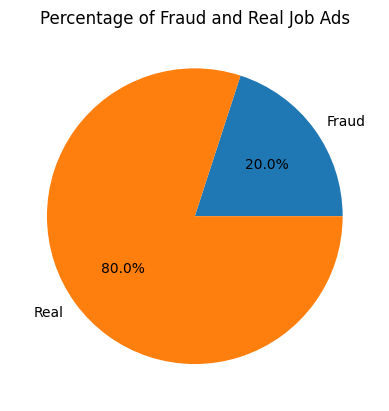

In [248]:
# Count the number of real and fraudulent job ads
fraud_count1 = balanced_data_train1[balanced_data_train1['fraudulent']==1].shape[0]
real_count1 = balanced_data_train1[balanced_data_train1['fraudulent']==0].shape[0]

# Create a list of counts and labels for the pie chart
counts1 = [fraud_count1, real_count1]
labels1 = ['Fraud', 'Real']

# Create the pie chart
plt.pie(counts1, labels=labels1, autopct='%1.1f%%')
plt.title('Percentage of Fraud and Real Job Ads')
plt.show()

#### Up sampling on the test data

In [249]:
# Separate the fraud and non-fraud samples
fraud_test1 = test_data1[test_data1['fraudulent'] == 1]
not_fraud_test1 = test_data1[test_data1['fraudulent'] == 0]

# Upsample the fraud samples to increase their representation
fraud_upsampled_test1 = resample(fraud_test1, replace=True, n_samples=int(0.25 * len(not_fraud_test1)))

# Combine the upsampled fraud samples with the non-fraud samples
balanced_test_data1 = pd.concat([not_fraud_test1, fraud_upsampled_test1])

# Shuffle the data
balanced_data_test1 = balanced_test_data1.sample(frac=1)

In [250]:
balanced_data_test1['fraudulent'].value_counts()

fraudulent
0    2672
1     668
Name: count, dtype: int64

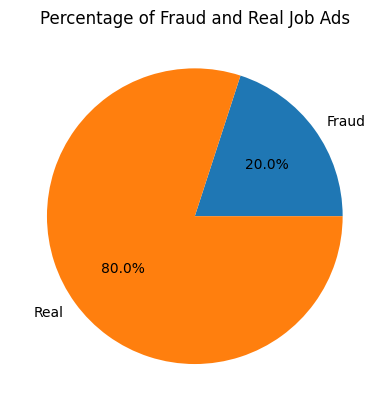

In [251]:
# Count the number of real and fraudulent job ads
fraud_count1 = balanced_data_test1[balanced_data_test1['fraudulent']==1].shape[0]
real_count1 = balanced_data_test1[balanced_data_test1['fraudulent']==0].shape[0]

# Create a list of counts and labels for the pie chart
counts1 = [fraud_count1, real_count1]
labels1 = ['Fraud', 'Real']

# Create the pie chart
plt.pie(counts1, labels=labels1, autopct='%1.1f%%')
plt.title('Percentage of Fraud and Real Job Ads')
plt.show()

In [252]:
# Split train set into features and target variables
X_train1 = balanced_data_train1.drop(columns=['fraudulent'])
y_train1 = balanced_data_train1['fraudulent']

# Split test set into features and target variables
X_test1 = balanced_data_test1.drop(columns=['fraudulent'])
y_test1 = balanced_data_test1['fraudulent']

In [253]:
print(f"Train size: {X_train1.shape[0]}")
print(f"Test size: {X_test1.shape[0]}")

Train size: 13393
Test size: 3340


In [254]:
print("Train\n-----------\n", pd.value_counts(y_train1)/y_train1.shape[0])
print("\nTest\n-----------\n", pd.value_counts(y_test1)/y_test1.shape[0])

Train
-----------
 fraudulent
0    0.800045
1    0.199955
Name: count, dtype: float64

Test
-----------
 fraudulent
0    0.8
1    0.2
Name: count, dtype: float64


## model results after data improve

In [255]:
improveModel = MLPClassifier(activation='tanh', hidden_layer_sizes=[30, 30],
              learning_rate_init=0.01, max_iter=1000, random_state=1)

In [256]:
improveModel.fit(X_train1,y_train1)

MLPClassifier(activation='tanh', hidden_layer_sizes=[30, 30],
              learning_rate_init=0.01, max_iter=1000, random_state=1)

In [257]:
scores = cross_val_score(improveModel, X_train1 , y_train1 , cv = 5, scoring='roc_auc')

In [258]:
print("Mean ROC AUC Score:", scores.mean())

Mean ROC AUC Score: 0.9953287661977509


In [259]:
print(f"Test roc_auc score: {roc_auc_score(y_test1, improveModel.predict_proba(X_test1)[:,1]):.4f}")
print(confusion_matrix(y_test1, improveModel.predict(X_test1)))

Test roc_auc score: 0.9182
[[2615   57]
 [ 242  426]]


### Model improvement using Bagging

In [260]:
from sklearn.ensemble import BaggingClassifier

# Create a Bagging ensemble of MLP models
ensemble_model = BaggingClassifier(improveModel, n_estimators=10, random_state=1)

# Train the ensemble model
ensemble_model.fit(X_train1, y_train1)

# Make predictions
#predictions = ensemble_model.predict(X_test1)


BaggingClassifier(estimator=MLPClassifier(activation='tanh',
                                          hidden_layer_sizes=[30, 30],
                                          learning_rate_init=0.01,
                                          max_iter=1000, random_state=1),
                  random_state=1)

In [261]:
print(f"Test roc_auc score: {roc_auc_score(y_test1, ensemble_model.predict_proba(X_test1)[:,1]):.4f}")
print(confusion_matrix(y_test1, ensemble_model.predict(X_test1)))

Test roc_auc score: 0.9394
[[2621   51]
 [ 219  449]]


# Predicting on the test set -------------------------------------------------

In [262]:
df

job_id                             title  location  \
0        7851          EROAD - Application Form      APAC   
1         332   Application Security Consultant  Americas   
2        5445                    Executive Chef      APAC   
3        7874                Digital Copywriter  Americas   
4       15471                    PHP Developers      APAC   
...       ...                               ...       ...   
14299    8298                  Business Teacher  Americas   
14300   17087           Title Account Executive  Americas   
14301    8326  Outside Sales Professional-Alsip  Americas   
14302    4670    Associate Business Development      EMEA   
14303    8271                        ACCOUNTANT      EMEA   

                   department salary_range  \
0                     Unknown      Unknown   
1       Professional Services      Unknown   
2                     Unknown        large   
3                     Unknown      Unknown   
4      Fixed-term & Permanent      Unknown   
...                       ...          ...   
14299                 Unknown      Unknown   
14300                 Unknown      Unknown   
14301                 Unknown      Unknown   
14302                 Unknown      Unknown   
14303                 Unknown      Unknown   

                                         company_profile  \
0      EROAD was established to modernise New Zealand...   
1      Cylance is a global cybersecurity products and...   
2      Le Meridien is situated in the heart of kuala ...   
3      Kettle is an independent digital agency based ...   
4      SilverStripe CMS &amp; Framework is an open so...   
...                                                  ...   
14299  The Albany Charter School Network is a family ...   
14300  Network Closing Services has been serving Lend...   
14301  ABC Supply Co., Inc. is the nation’s largest w...   
14302                                                      
14303                                                      

                                             description  \
0      Please complete our application form and submi...   
1      SummaryImmediate requirement for an advanced s...   
2      Responsible for all food production including ...   
3      Kettle is a growing digital agency focused on ...   
4      If you want to build world-class web applicati...   
...                                                  ...   
14299  Do you have what it takes to cultivate the nex...   
14300  This is who we are: Network Closing Services, ...   
14301  As an Outside Sales Representative, you will d...   
14302  Want to build a career in IT? Free training in...   
14303  Processes accounting transactions both per IFR...   

                                            requirements  \
0                                                          
1      QualificationsBachelor degree in Information T...   
2      Skills and Specifications:* Must have a passio...   
3                                                          
4                                                          
...                                                  ...   
14299  QUALIFICATIONSValid New York State Certificati...   
14300  What you should know:**Experienced candidates ...   
14301  As an Outside Sales Representative, you must h...   
14302                                                      
14303  University degree in Accounting or FinanceA po...   

                                                benefits  telecommuting  ...  \
0                                                                     0  ...   
1                                                                     0  ...   
2                                                                     0  ...   
3                                                                     0  ...   
4                                                                     0  ...   
...                                                  ...            ...  ...  

In [263]:
#loading the data
df_test = pd.read_csv('/Users/shani/Documents/לימודים שנה ד סמסטר ב/ML/ML Project PartB/X_test.csv')

In [264]:
df_test

job_id                                              title  \
0      12799               Life Insurance Agent - Riverside, CA   
1       7147                            English Teacher Abroad    
2        714                                     Java Developer   
3       4332  Sheffield Lettings Agency Office Assistant App...   
4       3268                                     Head of People   
...      ...                                                ...   
3571    5562               Accounting Administrator (Part time)   
3572   17139                                            Mentors   
3573    8806              Sales Professional - Buiding Products   
3574   13457                                  Open Applications   
3575   17405                   Senior UX / Interaction Designer   

               location department salary_range  \
0     US, CA, Riverside        NaN          NaN   
1       US, VA, Ettrick        NaN          NaN   
2                DE, ,         NaN          NaN   
3       GB, , Sheffield        NaN          NaN   
4       GB, LND, London        NaN          NaN   
...                 ...        ...          ...   
3571    GB, LND, London    Finance          0-0   
3572       GB, , london        NaN          NaN   
3573   CA, BC, Kamloops        NaN  60000-80000   
3574                NaN        NaN          NaN   
3575    NZ, N, Auckland        NaN          NaN   

                                        company_profile  \
0     Even though we’ve been industry leaders for ye...   
1     We help teachers get safe &amp; secure jobs ab...   
2                                                   NaN   
3     Established on the principles that full time e...   
4     Depop is an exciting new mobile marketplace wh...   
...                                                 ...   
3571  Founded in 2010 by a team from Google’s London...   
3572  Adthena is the UK’s leading competitive intell...   
3573  Great Customer Service from Start to FinishWha...   
3574  MediaMonks is the biggest creative digital pro...   
3575  Tailor is a digital agency specialising in thr...   

                                            description  \
0     Why become an ASUREA agent?People work with us...   
1     Play with kids, get paid for it Love travel? J...   
2     Sample content. Please view our careers page f...   
3     Government funding is only available for 16-18...   
4     About DepopDepop is an exciting new mobile mar...   
...                                                 ...   
3571  Qubit are currently seeking an accounts admini...   
3572  This is a job description for mentors to the v...   
3573  Centra Windows an established, employee-owned ...   
3574  Nothing that matches your skill set? We have a...   
3575  We're looking for a Senior UX / Interaction De...   

                                           requirements  \
0     We are looking for Agents that have:Life &amp;...   
1     University degree required. TEFL / TESOL / CEL...   
2                                                   NaN   
3     16-18 year olds only due to government funding...   
4     About YouProven track record in a HR or People...   
...                                                 ...   
3571  What you’ll needAn understanding of the fundam...   
3572       Experience with B2B software Saas businesses   
3573                                                NaN   
3574                                                NaN   
3575  Right now, your job title may be interaction, ...   

                                               benefits  telecommuting  \
0                                                   NaN              0   
1                                   See job description              0   
2                                                   NaN              0   
3                                     Career prospects.              0   
4     If you want to be part of this amazing team at...              0   
...              

# 1. Pre-processing on test

In [265]:
df_test

job_id                                              title  \
0      12799               Life Insurance Agent - Riverside, CA   
1       7147                            English Teacher Abroad    
2        714                                     Java Developer   
3       4332  Sheffield Lettings Agency Office Assistant App...   
4       3268                                     Head of People   
...      ...                                                ...   
3571    5562               Accounting Administrator (Part time)   
3572   17139                                            Mentors   
3573    8806              Sales Professional - Buiding Products   
3574   13457                                  Open Applications   
3575   17405                   Senior UX / Interaction Designer   

               location department salary_range  \
0     US, CA, Riverside        NaN          NaN   
1       US, VA, Ettrick        NaN          NaN   
2                DE, ,         NaN          NaN   
3       GB, , Sheffield        NaN          NaN   
4       GB, LND, London        NaN          NaN   
...                 ...        ...          ...   
3571    GB, LND, London    Finance          0-0   
3572       GB, , london        NaN          NaN   
3573   CA, BC, Kamloops        NaN  60000-80000   
3574                NaN        NaN          NaN   
3575    NZ, N, Auckland        NaN          NaN   

                                        company_profile  \
0     Even though we’ve been industry leaders for ye...   
1     We help teachers get safe &amp; secure jobs ab...   
2                                                   NaN   
3     Established on the principles that full time e...   
4     Depop is an exciting new mobile marketplace wh...   
...                                                 ...   
3571  Founded in 2010 by a team from Google’s London...   
3572  Adthena is the UK’s leading competitive intell...   
3573  Great Customer Service from Start to FinishWha...   
3574  MediaMonks is the biggest creative digital pro...   
3575  Tailor is a digital agency specialising in thr...   

                                            description  \
0     Why become an ASUREA agent?People work with us...   
1     Play with kids, get paid for it Love travel? J...   
2     Sample content. Please view our careers page f...   
3     Government funding is only available for 16-18...   
4     About DepopDepop is an exciting new mobile mar...   
...                                                 ...   
3571  Qubit are currently seeking an accounts admini...   
3572  This is a job description for mentors to the v...   
3573  Centra Windows an established, employee-owned ...   
3574  Nothing that matches your skill set? We have a...   
3575  We're looking for a Senior UX / Interaction De...   

                                           requirements  \
0     We are looking for Agents that have:Life &amp;...   
1     University degree required. TEFL / TESOL / CEL...   
2                                                   NaN   
3     16-18 year olds only due to government funding...   
4     About YouProven track record in a HR or People...   
...                                                 ...   
3571  What you’ll needAn understanding of the fundam...   
3572       Experience with B2B software Saas businesses   
3573                                                NaN   
3574                                                NaN   
3575  Right now, your job title may be interaction, ...   

                                               benefits  telecommuting  \
0                                                   NaN              0   
1                                   See job description              0   
2                                                   NaN              0   
3                                     Career prospects.              0   
4     If you want to be part of this amazing team at...              0   
...              

## Missing values:

In [266]:
df_test['location'].fillna('Unknown', inplace=True)
df_test['company_profile'].fillna('', inplace=True)
df_test['description'].fillna('', inplace=True)
df_test['requirements'].fillna('', inplace=True)
df_test['benefits'].fillna('', inplace=True)
df_test['salary_range'].fillna('', inplace=True)
df_test['employment_type'].fillna('Unknown', inplace=True)
df_test['department'].fillna('Unknown', inplace=True)
df_test['required_experience'].fillna('Unknown', inplace=True)
df_test['required_education'].fillna('Unknown', inplace=True)
df_test['industry'].fillna('Unknown', inplace=True)
df_test['function'].fillna('Unknown', inplace=True)

## Data type conversions:

### Location

In [267]:
# Define a function to extract the category from a location value
def extract_category(location):
    return location.split(',')[0].strip()

# Apply the mapping to the 'location' column
df_test['location'] = df_test['location'].apply(extract_category)

In [268]:
# Define the mapping
category_mapping = {
    'NZ': 'APAC',
    'US': 'Americas',
    'MY': 'APAC',
    'GB': 'EMEA',
    'CA': 'Americas',
    'GR': 'EMEA',
    'ES': 'EMEA',
    'BH': 'EMEA',
    'VN': 'APAC',
    'IN': 'APAC',
    'DE': 'EMEA',
    'NL': 'EMEA',
    'PH': 'APAC',
    'AU': 'APAC',
    'HK': 'APAC',
    'KH': 'APAC',
    'SI': 'EMEA',
    'EE': 'EMEA',
    'Unknown': 'Unknown',
    'RS': 'EMEA',
    'EG': 'EMEA',
    'BR': 'Americas',
    'PL': 'EMEA',
    'ZA': 'Africa',
    'IL': 'EMEA',
    'FR': 'EMEA',
    'BE': 'EMEA',
    'IE': 'EMEA',
    'MT': 'EMEA',
    'MU': 'EMEA',
    'IQ': 'EMEA',
    'TR': 'EMEA',
    'CY': 'EMEA',
    'IT': 'EMEA',
    'AE': 'EMEA',
    'DK': 'EMEA',
    'RO': 'EMEA',
    'SG': 'APAC',
    'FI': 'EMEA',
    'CH': 'EMEA',
    'SE': 'EMEA',
    'PK': 'APAC',
    'BY': 'EMEA',
    'KE': 'Africa',
    'AR': 'Americas',
    'TT': 'Americas',
    'NO': 'EMEA',
    'PT': 'EMEA',
    'GH': 'Africa',
    'LT': 'EMEA',
    'PA': 'Americas',
    'LV': 'EMEA',
    'PE': 'Americas',
    'JP': 'APAC',
    'KR': 'APAC',
    'KW': 'EMEA',
    'ZM': 'Africa',
    'BD': 'APAC',
    'SA': 'EMEA',
    'RU': 'EMEA',
    'VI': 'Unknown',
    'MX': 'Americas',
    'BG': 'EMEA',
    'CZ': 'EMEA',
    'NG': 'Africa',
    'CO': 'Americas',
    'NI': 'Americas',
    'AT': 'EMEA',
    'LU': 'EMEA',
    'ID': 'APAC',
    'HU': 'EMEA',
    'TH': 'APAC',
    'UG': 'Africa',
    'CN': 'APAC',
    'QA': 'EMEA',
    'CM': 'Africa',
    'LK': 'APAC',
    'UA': 'EMEA',
    'SK': 'EMEA',
    'CL': 'Americas',
    'SV': 'Americas',
    'AM': 'EMEA',
    'TW': 'APAC',
    'TN': 'EMEA',
    'KZ': 'EMEA',
    'IS': 'EMEA',
    'AL': 'EMEA'
}

# Apply the mapping to the 'category' column
df_test['location'] = df_test['location'].map(category_mapping)

# Count the number of categories and regions
df_test['location'].unique()    # number of regions

array(['Americas', 'EMEA', 'APAC', 'Unknown', nan, 'Africa'], dtype=object)

In [269]:
dummies_location_test = pd.get_dummies(df_test['location'], prefix='location', dtype =int)
df_test = pd.concat([df_test, dummies_location_test],axis=1)

### Employment type:

In [270]:
dummies_employment_type_test = pd.get_dummies(df_test['employment_type'], prefix='employment_type',dtype =int)
df_test = pd.concat([df_test, dummies_employment_type_test], axis=1)

### Required experience:

In [271]:
dummies_required_experience_test = pd.get_dummies(df_test['required_experience'], prefix='required_experience',dtype =int)
df_test = pd.concat([df_test, dummies_required_experience_test], axis=1)

### Required education:

In [272]:
required_education_mapping = {'Phd': 'Higher Education',
               "Master's Degree": 'Higher Education',
               "Bachelor's Degree": 'Higher Education',
                'Doctorate': 'Higher Education',
               'Associate Degree': 'Associate Education',
               'High School or equivalent': 'High School Education',
                'Some High School Coursework':'High School Education',
               'Some College Coursework Completed': 'College Education',
               'Professional': 'Professional Education',
               'Vocational': 'Professional Education',
               'Vocational - HS Diploma': 'Professional Education',
               'Vocational - Degree': 'Professional Education',
                'Unspecified': 'Unknown',
                'Unknown': 'Unknown',
                'Certification': 'Certification Education'}

# Replace values in the 'required_education' column
df_test['required_education'] = df_test['required_education'].replace(required_education_mapping)


In [273]:
dummies_required_education_test = pd.get_dummies(df_test['required_education'], prefix='required_education',dtype =int)
df_test = pd.concat([df_test, dummies_required_education_test], axis=1)

### Industry

In [274]:
industry_mapping = {'Unknown': 'Unknown',
                    'Hospitality': 'Other Services',
                    'Online Media': 'Internet',
                    'Medical Practice': 'Healthcare',
                    'Internet': 'Internet',
                    'Financial Services': 'Finance',
                    'Pharmaceuticals': 'Healthcare',
                    'Real Estate': 'Real Estate',
                    'Oil & Energy': 'Energy',
                    'Marketing and Advertising': 'Marketing',
                    'Food Production': 'Food',
                    'Computer Software': 'Technology',
                    'Building Materials': 'Construction',
                    'Telecommunications': 'Telecom',
                    'Nonprofit Organization Management': 'Nonprofit',
                    'Hospital & Health Care': 'Healthcare',
                    'Logistics and Supply Chain': 'Logistics',
                    'Cosmetics': 'Beauty',
                    'Construction': 'Construction',
                    'Retail': 'Retail',
                    'Warehousing': 'Logistics',
                    'Security and Investigations': 'Security',
                    'Management Consulting': 'Consulting',
                    'Civic & Social Organization': 'Nonprofit',
                    'Consumer Services': 'Other Services',
                    'Information Technology and Services': 'Technology',
                    'Government Administration': 'Government',
                    'Staffing and Recruiting': 'HR',
                    'Fund-Raising': 'Nonprofit',
                    'Leisure, Travel & Tourism': 'Travel',
                    'Media Production': 'Media',
                    'Health, Wellness and Fitness': 'Healthcare',
                    'Insurance': 'Insurance',
                    'E-Learning': 'Education',
                    'Publishing': 'Media',
                    'Education Management': 'Education',
                    'Graphic Design': 'Design',
                    'Events Services': 'Events',
                    'Computer Games': 'Gaming',
                    'Legal Services': 'Legal',
                    'Wholesale': 'Retail',
                    'Banking': 'Finance',
                    'Venture Capital & Private Equity': 'Finance',
                    'Electrical/Electronic Manufacturing': 'Manufacturing',
                    'Utilities': 'Energy',
                    'Mechanical or Industrial Engineering': 'Engineering',
                    'Machinery': 'Manufacturing',
                    'Consumer Electronics': 'Technology',
                    'Consumer Goods': 'Retail',
                    'Transportation/Trucking/Railroad': 'Transportation',
                    'Human Resources': 'HR',
                    'Restaurants': 'Food',
                    'Business Supplies and Equipment': 'Business',
                    'Airlines/Aviation': 'Transportation',
                    'Defense & Space': 'Government',
                    'Food & Beverages': 'Food',
                    'Research': 'Research',
                    'Market Research': 'Research',
                    'Mental Health Care': 'Healthcare',
                    'Design': 'Design',
                    'Apparel & Fashion': 'Fashion',
                    'Automotive': 'Automotive',
                    'Biotechnology': 'Biotech',
                    'Computer Networking': 'Technology',
                    'Executive Office': 'Business',
                    'Photography': 'Media',
                    'Aviation & Aerospace': 'Transportation',
                    'Chemicals': 'Manufacturing',
                    'Computer & Network Security': 'Technology',
                    'Law Practice': 'Legal',
                    'Computer Hardware': 'Technology',
                    'Gambling & Casinos': 'Gaming',
                    'Architecture & Planning': 'Architecture',
                    'Printing': 'Printing',
                    'Primary/Secondary Education': 'Education',
                    'Accounting': 'Finance',
                    'Renewables & Environment': 'Environment',
                    'Outsourcing/Offshoring': 'Business',
                    'Facilities Services': 'Business',
                    'Professional Training & Coaching': 'Education',
                    'Medical Devices': 'Healthcare',
                    'Government Relations': 'Government'}

df_test['industry'] = df_test['industry'].map(industry_mapping)

In [275]:
dummies_industry_test = pd.get_dummies(df_test['industry'], prefix='industry',dtype =int)
df_test = pd.concat([df_test, dummies_industry_test],axis=1)

### Function:

In [276]:
# Map the function values to more general categories

function_map = {
    'Unknown' : 'Unknown', 
    'Other' : 'Other', 
    'Art/Creative' : 'Creative', 
    'Health Care Provider' : 'Services',
    'Writing/Editing' : 'Creative', 
    'Customer Service' : 'Services', 
    'Administrative' : 'Admin',
    'Human Resources' : 'Admin', 
    'Advertising' : 'sales and marketing', 
    'Manufacturing' : 'production',
    'Information Technology' : 'IT and Data', 
    'Accounting/Auditing' : 'Admin', 
    'Engineering' : 'Engineering'  ,
    'Marketing' : 'sales and marketing', 
    'Sales' : 'sales and marketing', 
    'Strategy/Planning' :'Business', 
    'Business Development':'Business',
    'Data Analyst': 'IT and Data', 
    'Finance':'Business', 
    'Financial Analyst' : 'IT and Data', 
    'Management' : 'Admin',
    'Product Management' : 'Business', 
    'Design' : 'Creative', 
    'Consulting' : 'Admin', 
    'Legal' : 'Admin',
    'Distribution': 'production', 
    'Education' : 'Other', 
    'Project Management' : 'Business',
    'Quality Assurance' : 'Services', 
    'Supply Chain' : 'production', 
    'Production': 'production', 
    'Research' : 'Other',
    'General Business' : 'Business', 
    'Business Analyst' : 'IT and Data', 
    'Public Relations':'Other',
    'Science':'Other', 
    'Training':'Other', 
    'Purchasing':'sales and marketing'
}

df_test['function'] = df_test['function'].map(function_map)

In [277]:
dummies_function_test = pd.get_dummies(df_test['function'], prefix='function',dtype =int)
df_test = pd.concat([df_test, dummies_function_test],axis=1)

### Salary range:

In [278]:
def categorize_salary_range(salary_range):
    if isinstance(salary_range, str):
        salary_number_value = [int(s) for s in re.split(r'[-_ ]', salary_range) if s.isdigit()]
        if len(salary_number_value) >= 2:
            salary = salary_number_value[0]
            if salary < 30000:
                return 'small'
            elif salary < 60000:
                return 'medium'
            else:
                return 'large'
        else:
            return 'Unknown'
    else:
        return 'Unknown'

df_test['salary_range'] = df_test['salary_range'].apply(categorize_salary_range)

In [279]:
dummies_salary_range_test = pd.get_dummies(df_test['salary_range'], prefix='salary_range',dtype =int)
df_test = pd.concat([df_test, dummies_salary_range_test],axis=1)

# 2. Feature Extraction on test

## functions we use for Feature Extraction :

In [280]:
def count_words(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    count = len(words)
    return count

### Title features:

#### Title contains (1) words from list of only fraud's title words, or not (0)

In [281]:
fraud_only_title_words = only_fraud_title_words # list of fraud ads title's words 

def check_for_words(title):# check if any of the fraud words are in the given title
    return any(word in str(title).lower() for word in fraud_only_title_words)

df_test['title_fraud_words'] = df_test['title'].apply(check_for_words).astype(int)

### Company_profile features:

In [282]:
df_test['company_profile_length'] = df_test['company_profile'].apply(lambda x: len(str(x)))

In [283]:
df_test['company_profile_words_amount'] = df_test['company_profile'].apply(lambda x: count_words(x))

### Description features:

In [284]:
df_test['description_length'] = df_test['description'].apply(lambda x: len(str(x)))

In [285]:
df_test['description_words_amount'] = df_test['description'].apply(lambda x: count_words(x))

### Requirements features:

In [286]:
df_test['requirements_length'] = df_test['requirements'].apply(lambda x: len(str(x)))

In [287]:
df_test['requirements_words_amount'] = df_test['requirements'].apply(lambda x: count_words(x))

### Benefits features:

In [288]:
df_test['benefits_length'] = df_test['benefits'].apply(lambda x: len(str(x)))

In [289]:
df_test['benefits_words_amount'] = df_test['benefits'].apply(lambda x: count_words(x))

In [290]:
df_test.head(5)

job_id                                              title  location  \
0   12799               Life Insurance Agent - Riverside, CA  Americas   
1    7147                            English Teacher Abroad   Americas   
2     714                                     Java Developer      EMEA   
3    4332  Sheffield Lettings Agency Office Assistant App...      EMEA   
4    3268                                     Head of People      EMEA   

  department salary_range                                    company_profile  \
0    Unknown      Unknown  Even though we’ve been industry leaders for ye...   
1    Unknown      Unknown  We help teachers get safe &amp; secure jobs ab...   
2    Unknown      Unknown                                                      
3    Unknown      Unknown  Established on the principles that full time e...   
4    Unknown      Unknown  Depop is an exciting new mobile marketplace wh...   

                                         description  \
0  Why become an ASUREA agent?People work with us...   
1  Play with kids, get paid for it Love travel? J...   
2  Sample content. Please view our careers page f...   
3  Government funding is only available for 16-18...   
4  About DepopDepop is an exciting new mobile mar...   

                                        requirements  \
0  We are looking for Agents that have:Life &amp;...   
1  University degree required. TEFL / TESOL / CEL...   
2                                                      
3  16-18 year olds only due to government funding...   
4  About YouProven track record in a HR or People...   

                                            benefits  telecommuting  ...  \
0                                                                 0  ...   
1                                See job description              0  ...   
2                                                                 0  ...   
3                                  Career prospects.              0  ...   
4  If you want to be part of this amazing team at...              0  ...   

   salary_range_small  title_fraud_words company_profile_length  \
0                   0                  0                    858   
1                   0                  0                     53   
2                   0                  0                      0   
3                   0                  1                    829   
4                   0                  0                    536   

  company_profile_words_amount description_length description_words_amount  \
0                           73                640                       59   
1                            8                381                       53   
2                            0                 65                        9   
3                           72                573                       50   
4                           50               2399                      230   

  requirements_length  requirements_words_amount  benefits_length  \
0                 226                         20                0   
1                 130                         13               19   
2                   0                          0                0   
3                  70                          8               17   
4                 931                         91              141   

   benefits_words_amount  
0                      0  
1                      3  
2                      0  
3                      2  
4                     13  

[5 rows x 105 columns]

# 3. Feature Representation on test

###  normalize all numeric values to [0-1] scale by dividing in the max value:

In [291]:
max_company_profile_length = df_test['company_profile_length'].max()
df_test['company_profile_length'] = df_test['company_profile_length'] / max_company_profile_length

In [292]:
max_company_profile_words_amount = df_test['company_profile_words_amount'].max()
df_test['company_profile_words_amount'] = df_test['company_profile_words_amount'] / max_company_profile_words_amount

In [293]:
max_description_length = df_test['description_length'].max()
df_test['description_length'] = df_test['description_length'] / max_description_length

In [294]:
max_description_words_amount = df_test['description_words_amount'].max()
df_test['description_words_amount'] = df_test['description_words_amount'] / max_description_words_amount

In [295]:
max_requirements_length = df_test['requirements_length'].max()
df_test['requirements_length'] = df_test['requirements_length'] / max_requirements_length

In [296]:
max_requirements_words_amount = df_test['requirements_words_amount'].max()
df_test['requirements_words_amount'] = df_test['requirements_words_amount'] / max_requirements_words_amount

In [297]:
max_benefits_length = df_test['benefits_length'].max()
df_test['benefits_length'] = df_test['benefits_length'] / max_benefits_length

In [298]:
max_benefits_words_amount = df_test['benefits_words_amount'].max()
df_test['benefits_words_amount'] = df_test['benefits_words_amount'] / max_benefits_words_amount

In [299]:
pd.set_option('display.max_columns', None)

In [300]:
df_test.head(5)

job_id                                              title  location  \
0   12799               Life Insurance Agent - Riverside, CA  Americas   
1    7147                            English Teacher Abroad   Americas   
2     714                                     Java Developer      EMEA   
3    4332  Sheffield Lettings Agency Office Assistant App...      EMEA   
4    3268                                     Head of People      EMEA   

  department salary_range                                    company_profile  \
0    Unknown      Unknown  Even though we’ve been industry leaders for ye...   
1    Unknown      Unknown  We help teachers get safe &amp; secure jobs ab...   
2    Unknown      Unknown                                                      
3    Unknown      Unknown  Established on the principles that full time e...   
4    Unknown      Unknown  Depop is an exciting new mobile marketplace wh...   

                                         description  \
0  Why become an ASUREA agent?People work with us...   
1  Play with kids, get paid for it Love travel? J...   
2  Sample content. Please view our careers page f...   
3  Government funding is only available for 16-18...   
4  About DepopDepop is an exciting new mobile mar...   

                                        requirements  \
0  We are looking for Agents that have:Life &amp;...   
1  University degree required. TEFL / TESOL / CEL...   
2                                                      
3  16-18 year olds only due to government funding...   
4  About YouProven track record in a HR or People...   

                                            benefits  telecommuting  \
0                                                                 0   
1                                See job description              0   
2                                                                 0   
3                                  Career prospects.              0   
4  If you want to be part of this amazing team at...              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              1       Full-time      Not Applicable   
1                 1              1        Contract             Unknown   
2                 0              0       Full-time         Entry level   
3                 1              1         Unknown         Entry level   
4                 1              0       Full-time           Associate   

      required_education   industry             function  location_APAC  \
0  High School Education  Insurance  sales and marketing              0   
1       Higher Education  Education              Unknown              0   
2                Unknown   Internet          Engineering              0   
3  High School Education    Unknown                Admin              0   
4       Higher Education         HR                Admin              0   

   location_Africa  location_Americas  location_EMEA  location_Unknown  \
0                0                  1              0                 0   
1                0                  1              0                 0   
2                0                  0              1                 0   
3                0                  0              1                 0   
4                0                  0              1                 0   

   employment_type_Contract  employment_type_Full-time  employment_type_Other  \
0                         0                          1                      0   
1                         1                          0                      0   
2                         0                          1                      0   
3                         0                          0                      0   
4                         0                          1                      0   

   employment_type_Part-time  employment_type_Temporary  \
0                          0                          0   
1                          0  

In [301]:
df_test.shape

(3576, 105)

# 4. Feature Selection on test

In [302]:
df_selected_test = df_test.drop(['job_id'], axis=1)
df_selected_test = df_selected_test.drop(['title'], axis=1)
df_selected_test = df_selected_test.drop(['location'], axis=1)
df_selected_test = df_selected_test.drop(['department'], axis=1)
df_selected_test = df_selected_test.drop(['description'], axis=1)
df_selected_test = df_selected_test.drop(['requirements'], axis=1)
df_selected_test = df_selected_test.drop(['benefits'], axis=1)
df_selected_test = df_selected_test.drop(['salary_range'], axis=1)
df_selected_test = df_selected_test.drop(['company_profile'], axis=1)
df_selected_test = df_selected_test.drop(['required_education'], axis=1)
df_selected_test = df_selected_test.drop(['function'], axis=1)
df_selected_test = df_selected_test.drop(['employment_type'], axis=1)
df_selected_test = df_selected_test.drop(['industry'], axis=1)
df_selected_test = df_selected_test.drop(['required_experience'], axis=1)

In [303]:
df_selected_test

telecommuting  has_company_logo  has_questions  location_APAC  \
0                 0                 1              1              0   
1                 0                 1              1              0   
2                 0                 0              0              0   
3                 0                 1              1              0   
4                 0                 1              0              0   
...             ...               ...            ...            ...   
3571              0                 1              1              0   
3572              0                 1              0              0   
3573              0                 1              1              0   
3574              0                 1              0              0   
3575              0                 1              1              1   

      location_Africa  location_Americas  location_EMEA  location_Unknown  \
0                   0                  1              0                 0   
1                   0                  1              0                 0   
2                   0                  0              1                 0   
3                   0                  0              1                 0   
4                   0                  0              1                 0   
...               ...                ...            ...               ...   
3571                0                  0              1                 0   
3572                0                  0              1                 0   
3573                0                  1              0                 0   
3574                0                  0              0                 1   
3575                0                  0              0                 0   

      employment_type_Contract  employment_type_Full-time  \
0                            0                          1   
1                            1                          0   
2                            0                          1   
3                            0                          0   
4                            0                          1   
...                        ...                        ...   
3571                         0                          0   
3572                         0                          0   
3573                         0                          1   
3574                         0                          0   
3575                         0                          1   

      employment_type_Other  employment_type_Part-time  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   
...                     ...                        ...   
3571                      0                          1   
3572                      0                          1   
3573                      0                          0   
3574                      0                          0   
3575                      0                          0   

      employment_type_Temporary  employment_type_Unknown  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        1   
4                             0                        0   
...                         ...                      ...   
3571                          0                        0   
3572                          0                        0   
3573                          0                        0   
3574                          0                        1   
3575                          0                        0   

      required_experience_Associate  required_experience_Director  \
0       

In [304]:
columns_to_drop = ['salary_range_small', 'requirements_words_amount', 'benefits_words_amount', 'required_education_Unknown', 'required_experience_Unknown', 'employment_type_Contract', 'employment_type_Unknown', 'company_profile_words_amount', 'location_Americas', 'salary_range_medium', 'description_words_amount', 'industry_Unknown']
df_selected_test = df_selected_test.drop(columns_to_drop, axis=1)

In [305]:
df_selected_test.shape

(3576, 79)

In [306]:
df_selected_test.head(5)

telecommuting  has_company_logo  has_questions  location_APAC  \
0              0                 1              1              0   
1              0                 1              1              0   
2              0                 0              0              0   
3              0                 1              1              0   
4              0                 1              0              0   

   location_Africa  location_EMEA  location_Unknown  \
0                0              0                 0   
1                0              0                 0   
2                0              1                 0   
3                0              1                 0   
4                0              1                 0   

   employment_type_Full-time  employment_type_Other  \
0                          1                      0   
1                          0                      0   
2                          1                      0   
3                          0                      0   
4                          1                      0   

   employment_type_Part-time  employment_type_Temporary  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   required_experience_Associate  required_experience_Director  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              1                             0   

   required_experience_Entry level  required_experience_Executive  \
0                                0                              0   
1                                0                              0   
2                                1                              0   
3                                1                              0   
4                                0                              0   

   required_experience_Internship  required_experience_Mid-Senior level  \
0                               0                                     0   
1                               0                                     0   
2                               0                                     0   
3                               0                                     0   
4                               0                                     0   

   required_experience_Not Applicable  required_education_Associate Education  \
0                                   1                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   required_education_Certification Education  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   required_education_College Education  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   required_education_High School Education  \
0                                         1   
1                                         0   
2                                         0   
3                                         1   
4                                     

## Model on test

In [307]:
# Assuming you have your feature matrix in a pandas DataFrame called 'df'
features_test = df_selected_test[[
       'employment_type_Full-time', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Temporary',
       'required_experience_Associate', 'required_experience_Director',
       'required_experience_Entry level', 'required_experience_Executive',
       'required_experience_Internship',
       'required_experience_Mid-Senior level',
       'required_experience_Not Applicable',
       'required_education_Associate Education',
       'required_education_Certification Education',
       'required_education_College Education',
       'required_education_High School Education',
       'required_education_Higher Education',
       'required_education_Professional Education', 'industry_Architecture',
       'industry_Automotive', 'industry_Beauty', 'industry_Biotech',
       'industry_Business', 'industry_Construction', 'industry_Consulting',
       'industry_Design', 'industry_Education', 'industry_Energy',
       'industry_Engineering', 'industry_Environment', 'industry_Events',
       'industry_Fashion', 'industry_Finance', 'industry_Food',
       'industry_Gaming', 'industry_Government', 'industry_HR',
       'industry_Healthcare', 'industry_Insurance', 'industry_Internet',
       'industry_Legal', 'industry_Logistics', 'industry_Manufacturing',
       'industry_Marketing', 'industry_Media', 'industry_Nonprofit',
       'industry_Other Services', 'industry_Printing', 'industry_Real Estate',
       'industry_Research', 'industry_Retail', 'industry_Security',
       'industry_Technology', 'industry_Telecom', 'industry_Transportation',
       'industry_Travel', 'function_Admin', 'function_Business',
       'function_Creative', 'function_Engineering', 'function_IT and Data',
       'function_Other', 'function_Services', 'function_Unknown',
       'function_production', 'function_sales and marketing',
       'salary_range_Unknown', 'salary_range_large', 'title_fraud_words']]
features_test

employment_type_Full-time  employment_type_Other  \
0                             1                      0   
1                             0                      0   
2                             1                      0   
3                             0                      0   
4                             1                      0   
...                         ...                    ...   
3571                          0                      0   
3572                          0                      0   
3573                          1                      0   
3574                          0                      0   
3575                          1                      0   

      employment_type_Part-time  employment_type_Temporary  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
...                         ...                        ...   
3571                          1                          0   
3572                          1                          0   
3573                          0                          0   
3574                          0                          0   
3575                          0                          0   

      required_experience_Associate  required_experience_Director  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 1                             0   
...                             ...                           ...   
3571                              0                             0   
3572                              0                             0   
3573                              0                             0   
3574                              0                             0   
3575                              0                             0   

      required_experience_Entry level  required_experience_Executive  \
0                                   0                              0   
1                                   0                              0   
2                                   1                              0   
3                                   1                              0   
4                                   0                              0   
...                               ...                            ...   
3571                                1                              0   
3572                                0                              0   
3573                                0                              0   
3574                                0                              0   
3575                                0                              0   

      required_experience_Internship  required_experience_Mid-Senior level  \
0                                  0                                     0   
1                                  0                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  0                                     0   
...                              ...                                   ...   
3571                               0                                     0   
3572                               0                                     0   
3573                               0                                     1   
3574                               0                                     0   
3575        

In [308]:
from sklearn.preprocessing import PolynomialFeatures
# Instantiate PolynomialFeatures
poly_features_test = PolynomialFeatures(degree=2, include_bias=False)

# Generate the interaction features
interactions_test = poly_features_test.fit_transform(features_test)

# Get the original feature names
original_feature_names_test = features_test.columns

# Generate the names for the interaction features
interaction_feature_names_test = []

# Iterate through each interaction term and create the feature names
for feature_comb in poly_features_test.powers_:
    if feature_comb.sum() > 1:
        interaction_feature = "*".join([original_feature_names_test[i] for i in np.where(feature_comb > 0)[0]])
        interaction_feature_names_test.append(interaction_feature)

# Create a new DataFrame with the original features and the generated interactions
df_interactions_test = pd.DataFrame(interactions_test, columns=list(original_feature_names_test) + interaction_feature_names_test)
df_interactions_test

employment_type_Full-time  employment_type_Other  \
0                           1.0                    0.0   
1                           0.0                    0.0   
2                           1.0                    0.0   
3                           0.0                    0.0   
4                           1.0                    0.0   
...                         ...                    ...   
3571                        0.0                    0.0   
3572                        0.0                    0.0   
3573                        1.0                    0.0   
3574                        0.0                    0.0   
3575                        1.0                    0.0   

      employment_type_Part-time  employment_type_Temporary  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
3571                        1.0                        0.0   
3572                        1.0                        0.0   
3573                        0.0                        0.0   
3574                        0.0                        0.0   
3575                        0.0                        0.0   

      required_experience_Associate  required_experience_Director  \
0                               0.0                           0.0   
1                               0.0                           0.0   
2                               0.0                           0.0   
3                               0.0                           0.0   
4                               1.0                           0.0   
...                             ...                           ...   
3571                            0.0                           0.0   
3572                            0.0                           0.0   
3573                            0.0                           0.0   
3574                            0.0                           0.0   
3575                            0.0                           0.0   

      required_experience_Entry level  required_experience_Executive  \
0                                 0.0                            0.0   
1                                 0.0                            0.0   
2                                 1.0                            0.0   
3                                 1.0                            0.0   
4                                 0.0                            0.0   
...                               ...                            ...   
3571                              1.0                            0.0   
3572                              0.0                            0.0   
3573                              0.0                            0.0   
3574                              0.0                            0.0   
3575                              0.0                            0.0   

      required_experience_Internship  required_experience_Mid-Senior level  \
0                                0.0                                   0.0   
1                                0.0                                   0.0   
2                                0.0                                   0.0   
3                                0.0                                   0.0   
4                                0.0                                   0.0   
...                              ...                                   ...   
3571                             0.0                                   0.0   
3572                             0.0                                   0.0   
3573                             0.0                                   1.0   
3574                             0.0                                   0.0   
3575        

In [309]:
df_selected_test.reset_index(drop=True, inplace=True)
df_interactions_test.reset_index(drop=True, inplace=True)

combined_df_test = pd.concat([df_selected_test, df_interactions_test], axis=1)

In [310]:
combined_df_test

telecommuting  has_company_logo  has_questions  location_APAC  \
0                 0                 1              1              0   
1                 0                 1              1              0   
2                 0                 0              0              0   
3                 0                 1              1              0   
4                 0                 1              0              0   
...             ...               ...            ...            ...   
3571              0                 1              1              0   
3572              0                 1              0              0   
3573              0                 1              1              0   
3574              0                 1              0              0   
3575              0                 1              1              1   

      location_Africa  location_EMEA  location_Unknown  \
0                   0              0                 0   
1                   0              0                 0   
2                   0              1                 0   
3                   0              1                 0   
4                   0              1                 0   
...               ...            ...               ...   
3571                0              1                 0   
3572                0              1                 0   
3573                0              0                 0   
3574                0              0                 1   
3575                0              0                 0   

      employment_type_Full-time  employment_type_Other  \
0                             1                      0   
1                             0                      0   
2                             1                      0   
3                             0                      0   
4                             1                      0   
...                         ...                    ...   
3571                          0                      0   
3572                          0                      0   
3573                          1                      0   
3574                          0                      0   
3575                          1                      0   

      employment_type_Part-time  employment_type_Temporary  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
...                         ...                        ...   
3571                          1                          0   
3572                          1                          0   
3573                          0                          0   
3574                          0                          0   
3575                          0                          0   

      required_experience_Associate  required_experience_Director  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 1                             0   
...                             ...                           ...   
3571                              0                             0   
3572                              0                             0   
3573                              0                             0   
3574                              0                             0   
3575                              0                             0   

      required_experience_Entry level  required_experience_Executive  \
0                                   0                              0   
1                                   0    

# Model predictions on test

In [311]:
test_predictions = ensemble_model.predict(combined_df_test)

In [312]:
predictions_df = pd.DataFrame({'Predictions': test_predictions})

In [313]:
predictions_df

Predictions
0               0
1               0
2               0
3               0
4               0
...           ...
3571            0
3572            0
3573            0
3574            0
3575            0

[3576 rows x 1 columns]

In [314]:
job_id = pd.DataFrame(df_test['job_id'])

In [315]:
job_id

job_id
0      12799
1       7147
2        714
3       4332
4       3268
...      ...
3571    5562
3572   17139
3573    8806
3574   13457
3575   17405

[3576 rows x 1 columns]

In [316]:
job_id.reset_index(drop=True, inplace=True)
predictions_df.reset_index(drop=True, inplace=True)

In [317]:
Test_Final = pd.concat([job_id, predictions_df], axis = 1)

In [318]:
Test_Final

job_id  Predictions
0      12799            0
1       7147            0
2        714            0
3       4332            0
4       3268            0
...      ...          ...
3571    5562            0
3572   17139            0
3573    8806            0
3574   13457            0
3575   17405            0

[3576 rows x 2 columns]

In [319]:
Test_Final.to_csv('G15_ytest.csv', index=False)